In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_score(context_size, model, category):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    lang_scores = {}
        
    for lang in lang_list:
        if category == None:
            score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        else:
            score_path =  disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
        #score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
        
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            #if model == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit" and context_size in ["1-2", "1-3", "1-4", "1-5"]:
              
    bleu_list = []
    comet_list = []
    for lang, score_list in lang_scores.items():
        bleu = score_list[0]
        if "sacrebleu" in bleu:
            bleu = bleu.replace("sacrebleu: ", "")
        else:
            print (lang, bleu)
            bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        if "comet: " in comet:
            comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


# b_score code

In [14]:
"""
def get_score_b(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    lang_list = os.listdir(disk_dir + f"/{context_size}")
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score_with_b.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            #print (score_path)
       
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list
"""

'\ndef get_score_b(context_size, model):\n    disk_dir = "/mnt/data-poseidon/sumire/thesis"\n    lang_list = os.listdir(disk_dir + f"/{context_size}")\n    \n    for id, lang in enumerate(lang_list):\n        lang_list[id] = lang_list[id].replace("en-", "")\n    \n    lang_scores = {}\n\n    for lang in lang_list:\n        score_path = disk_dir+f\'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score_with_b.txt\'\n        if os.path.exists(score_path):\n            with open(score_path,\'r\') as wf:\n                lang_scores[lang] = wf.readlines()\n                \n        else:\n            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]\n            #print (score_path)\n       \n    bleu_list = []\n    comet_list = []\n    for score_list in lang_scores.values():\n        bleu = score_list[0]\n        bleu = bleu.replace("bleu: ", "")\n        bleu = bleu.replace("\n", "")\n        bleu = float(bleu)\n        \n        comet = score_list[1]\n        comet = 

# get_and_return_score

In [3]:
def get_and_return_scores(scenario, model, category):
    comet_list, bleu_list, lang_list = get_score(scenario, model, category)
    scores = {
        'model': model,
        'scenario': scenario,
        'category': category,
        'comet_scores': comet_list,
        'bleu_scores': bleu_list,
    }
    return scores, lang_list

"""
def get_and_return_scores_b(scenario, model):
    comet_list_b, bleu_list_b, lang_list_b = get_score_b(scenario, model)
    scores_b = {
        'model': model,
        'scenario': scenario,
        'comet_scores': comet_list_b,
        'bleu_scores': bleu_list_b,
    }
    return scores_b, lang_list_b
"""

models = ["xglm", 
          "llama", 
          "Llama-2-70b-instruct-v2", 
          "llama-p2", 
          "xglm-p2", 
          "llama-1024", 
          "Llama-2-70b-instruct-v2-p2", 
          "llama-p3", 
          "xglm-p3", 
          "Llama-2-70b-instruct-v2-p3", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#", 
          "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit", 
          "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", 
          "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2",
         "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta",
         "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd",
         ]
scenarios = ["1-1", "2-1", "3-1", "4-1", "5-1", "6-1", "7-1", "8-1", "9-1", "10-1", "2-1-ante", "ante-1", "10-1to3-1", "10-1to4-1", "10-1to5-1", "1-2", "1-3", "1-4", "1-5"]
categories = [None, "muda", "pronouns", "lexical_cohesion", "formality", "verb_form"]
results = []


for model in models:
    for scenario in scenarios:
        for category in categories:
            #print (scenario)
            scores, lang_list = get_and_return_scores(scenario, model, category)
            results.append(scores)


# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results:
    if result['category']=="formality" and result['model'] == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit" :
        print(f"Model: {result['model']}, Scenario: {result['scenario']}, Category: {result['category']}")
        print(f"COMET Scores: {result['comet_scores']}")
        print(f"BLEU Scores: {result['bleu_scores']}")
        print()


ar bleu: 9.58069426751592

fr bleu: 19.267324960254392

ja bleu: 6.017918709677419

ko bleu: 8.813881553398058

de bleu: 14.72452173913043

zh bleu: 16.09243466453673

ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 9.188521656050964

fr bleu: 15.314973449920494

ja bleu: 5.884684193548385

ko bleu: 7.816133818770233

de bleu: 12.854174247491631

zh bleu: 15.909829552715628

ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
ar bleu: 0
fr bleu: 0
ja bleu: 0
ko bleu: 0
de bleu: 0
zh bleu: 0
a

In [19]:
"""
#withb
models_with_b = ["Llama-2-70b-instruct-v2-usas-zs-p3-#b#", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit"]
results_b = []

for model in models_with_b:
    for scenario in scenarios:
        scores_b, lang_list_b = get_and_return_scores_b(scenario, model)
        results_b.append(scores_b)

# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results_b:
    print(f"Model: {result['model']}, Scenario: {result['scenario']}")
    print(f"COMET Scores: {result['comet_scores']}")
    print(f"BLEU Scores: {result['bleu_scores']}")
    print()
    
print (results_b)
"""

'\n#withb\nmodels_with_b = ["Llama-2-70b-instruct-v2-usas-zs-p3-#b#", "Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit"]\nresults_b = []\n\nfor model in models_with_b:\n    for scenario in scenarios:\n        scores_b, lang_list_b = get_and_return_scores_b(scenario, model)\n        results_b.append(scores_b)\n\n# Now you have a list of dictionaries containing the scores for each model and scenario\n# You can access the results as needed\nfor result in results_b:\n    print(f"Model: {result[\'model\']}, Scenario: {result[\'scenario\']}")\n    print(f"COMET Scores: {result[\'comet_scores\']}")\n    print(f"BLEU Scores: {result[\'bleu_scores\']}")\n    print()\n    \nprint (results_b)\n'

In [8]:
print (lang_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']


In [14]:
[0.0]*len(lang_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
def scores_plot(model, category, relative, base_model, comet, bleu, fontsize, right_adjust):
    plt.rcParams.update({'font.size': fontsize})
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.07  # The width of the bars
    
    model_scores = []
    for result in results:
        if result['model'] == f'{model}':
            model_scores.append(result)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    
    #base_models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "Llama-2-70b-instruct-v2-usas-zs-p1" ]
    """
    for i in model_scores:
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            #for base_model in base_models:
                #if base_model in model:
            for result in results:
                if result["model"] == base_model and result["scenario"] =="1-1":
                    print ("base_model 1-1 exists")
                    rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')
    """
    
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')  
            
            
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} ante-1')
    
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
         for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["comet_scores"], width, label=f'{model} 1-1')  
        
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x -width  , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["comet_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 10-1')
            
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["comet_scores"], width, label=f'{model} 10-1to5-1')
            #elif i['scenario'] == 'ante-1':
                #rects9 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} ante-1')
        
    else:
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    
                    if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                        print ("1-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="1-1":
                                score = result["comet_scores"]
                                rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")# 1-1
                    elif i['scenario'] == '1-1' and i["comet_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["comet_scores"]
                        rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0" )#"1-1"
                    else: 
                        score = i["comet_scores"]

                else: #Show relatice score for 1-1 which should be zero
                    if i['category']==category:
                        if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                            base_score = i["comet_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")#"1-1"
                            
                        elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="1-1":
                                    base_score = result["comet_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")# 1-1

                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    
              
                if i['scenario'] == '2-1':
                    rects2 = ax.bar(x - width*3, score, width, label="n_src=1")#label=i['scenario']
                elif i['scenario'] == '3-1':
                    rects3 = ax.bar(x - width*2, score, width, label="n_src=2")
                elif i['scenario'] == '4-1':
                    rects4= ax.bar(x - width , score, width, label="n_src=3")
                elif i['scenario'] == '5-1':
                    rects5 = ax.bar(x , score, width, label="n_src=4")
                elif i['scenario'] == '1-2':
                    rects6 = ax.bar(x + width*1 , score, width, label="n_tgt=1")
                elif i['scenario'] == '1-3':
                    rects7 = ax.bar(x+ width*2, score, width, label="n_tgt=2")
                    print ("1-3", score)
                elif i['scenario'] == '1-4':
                    print ("1-4", score)
                    rects8 = ax.bar(x+ width*3, score, width, label="n_tgt=3")
                elif i['scenario'] == '1-5':
                    rects9 = ax.bar(x+ width*4, score, width,label="n_tgt=4")
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(comet[0], comet[1])
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'-{model}- COMET')
        else:
            ax.set_title(f'{category}-{model}- COMET')
    else:
        if category == None:
            ax.set_title(f'-Score gap with context-agnostic model (COMET)')
        else:
            ax.set_title(f'Score gap with ontext-agnostic model-{category}-(COMET)')
    """    
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot a
            
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["bleu_scores"], width, label=f'{model} 1-1')     
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*1, i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} ante-1')
                
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
        print ("zwwwwwwwww")
        for i in model_scores:     
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["bleu_scores"], width, label=f'{model} 1-1')  
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x - width  , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["bleu_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 10-1')
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["bleu_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["bleu_scores"], width, label=f'{model} 10-1to5-1')
    else:
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    
                    if i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                        print ("1-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="1-1":
                                score = result["bleu_scores"]
                                rects1 = ax.bar(x - width*4, score, width, label= f'1-1')
                    elif i['scenario'] == '1-1' and i["bleu_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["bleu_scores"]
                        rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                    else: 
                        score = i["bleu_scores"]

                else: #Show relatice score for 1-1 which should be zero
                    if i['category']==category:
                        if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                            base_score = i["bleu_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                            
                        elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="1-1":
                                    base_score = result["bleu_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")

                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    
                    print (score)
                if i['scenario'] == '2-1':
                    rects2 = ax.bar(x - width*3, score, width, label="n_src=1")
                elif i['scenario'] == '3-1':
                    rects3 = ax.bar(x - width*2, score, width, label="n_src=2")
                elif i['scenario'] == '4-1':
                    rects4= ax.bar(x - width , score, width, label="n_src=3")
                elif i['scenario'] == '5-1':
                    rects5 = ax.bar(x , score, width, label="n_src=4")
                elif i['scenario'] == '1-2':
                    rects6 = ax.bar(x + width*1 , score, width, label="n_tgt=1")
                elif i['scenario'] == '1-3':
                    rects7 = ax.bar(x+ width*2, score, width, label="n_tgt=2")
                    print ("1-3", score)
                elif i['scenario'] == '1-4':
                    rects8 = ax.bar(x+ width*3, score, width, label="n_tgt=3")
                elif i['scenario'] == '1-5':
                    rects9 = ax.bar(x+ width*4, score, width, label="n_tgt=4")

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(bleu[0], bleu[1])
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'{model}- BLEU')
        else:
            ax.set_title(f'{category}-{model}- BLEU')
    if relative == True:
        if category == None:
            ax.set_title(f'Score Gap with context-agnostic model- (BLEU)')
        else:
            ax.set_title(f'Score Gap with context-agnostic model-{category}- (BLEU)')
    """
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

### plot_b_code

In [22]:
"""
def scores_plot_b(model):
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.1  # The width of the bars
    
    model_scores = []
    for result in results_b:
        if result['model'] == f'{model}':
            model_scores.append(result)
    #print (xglm_comets)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
        
    for i in model_scores:
        print (i)
        # add 1-1 score from test_score.txt, instead of test_score_with_b.txt
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            print("equivalent 1-1 does not exists")
            for result in results:
                if result['scenario']=='1-1' and result['model'] == f'{model}':
                    model_scores.append(result)
        
    
    for i in model_scores:

        if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
            rects1 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 1-1') # Ja, FR is not continuous shot anymore
            print("equivalent 1-1 exists")
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["comet_scores"], width, label=f'{model} 2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["comet_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["comet_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 5-1')
    
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 1)
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}--WITH<#b#> COMET')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))

                            
    for i in model_scores:
        if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
            print("equivalent 1-1 exists")
            rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
        elif i['scenario'] == '2-1':
            rects2 = ax.bar(x - width, i["bleu_scores"], width, label=f'{model}2-1')
        elif i['scenario'] == '3-1':
            rects3 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 3-1')
        elif i['scenario'] == '4-1':
            rects4= ax.bar(x + width, i["bleu_scores"], width, label=f'{model} 4-1')
        elif i['scenario'] == '5-1':
            rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 5-1')

    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(0, 50)
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel('Scores')
    ax.set_title(f'-{model}-WITH<#b#> BLEU')
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    ax.legend(loc='lower left')

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
"""

# Contrapro

equivalent 1-1 exists
equivalent 1-1 exists
equivalent 1-1 exists
equivalent 1-1 exists
equivalent 1-1 exists
equivalent 1-1 exists


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

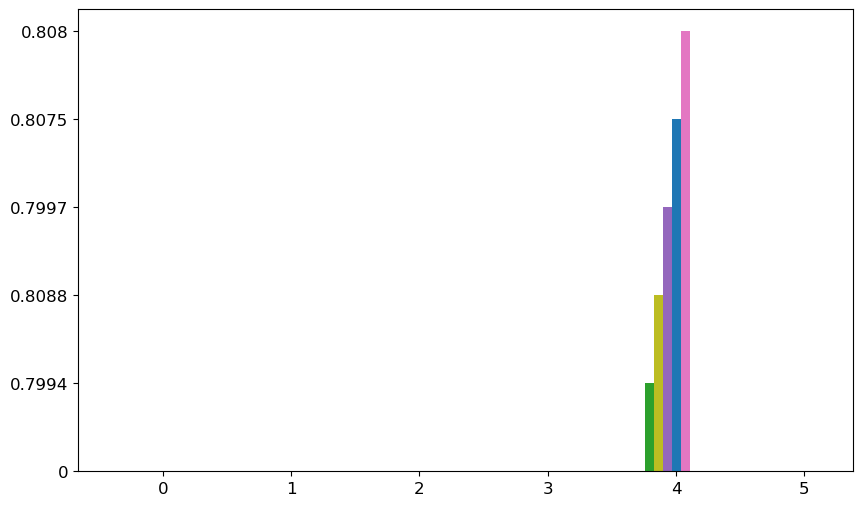

In [5]:
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", category=None, relative=False, base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

In [30]:
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.75,0.85), bleu=(20,30)) 

TypeError: scores_plot() missing 4 required positional arguments: 'category', 'relative', 'fontsize', and 'n_legend_col'

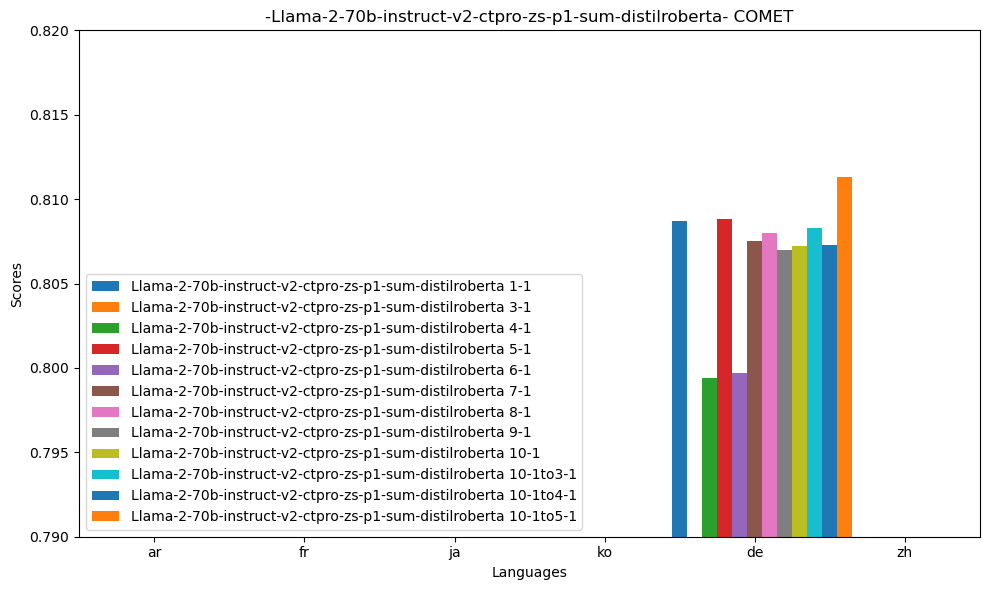

zwwwwwwwww


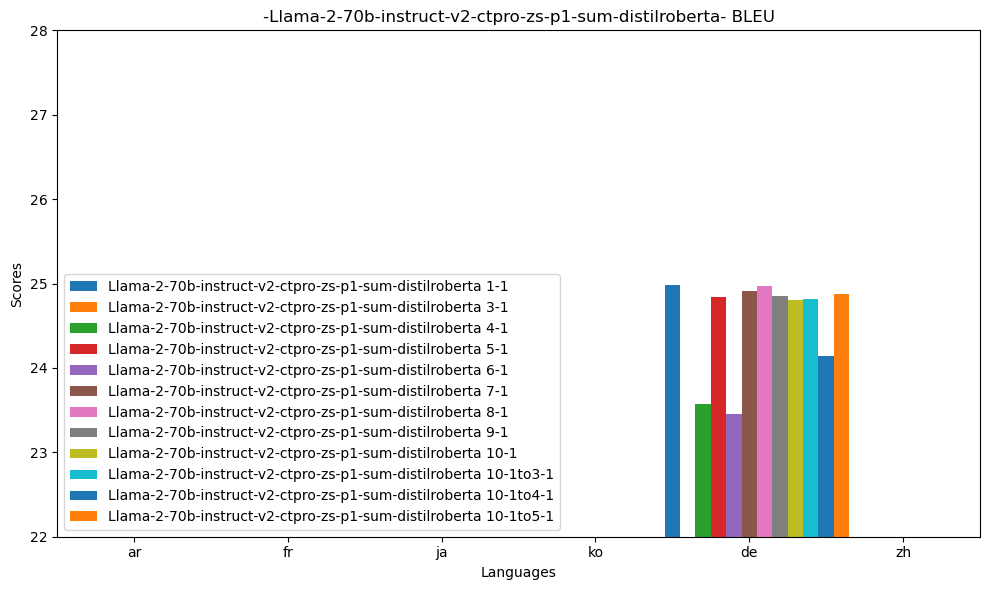

In [130]:
#ZOOM IN
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.79,0.82), bleu=(22,28)) 

# BSD Dataset

In [23]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd", "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-bsd", comet=(0,1), bleu=(0,40))

TypeError: scores_plot() missing 4 required positional arguments: 'relative', 'base_model', 'fontsize', and 'right_adjust'

# Contrapro 

yes
equivalent 1-1 exists


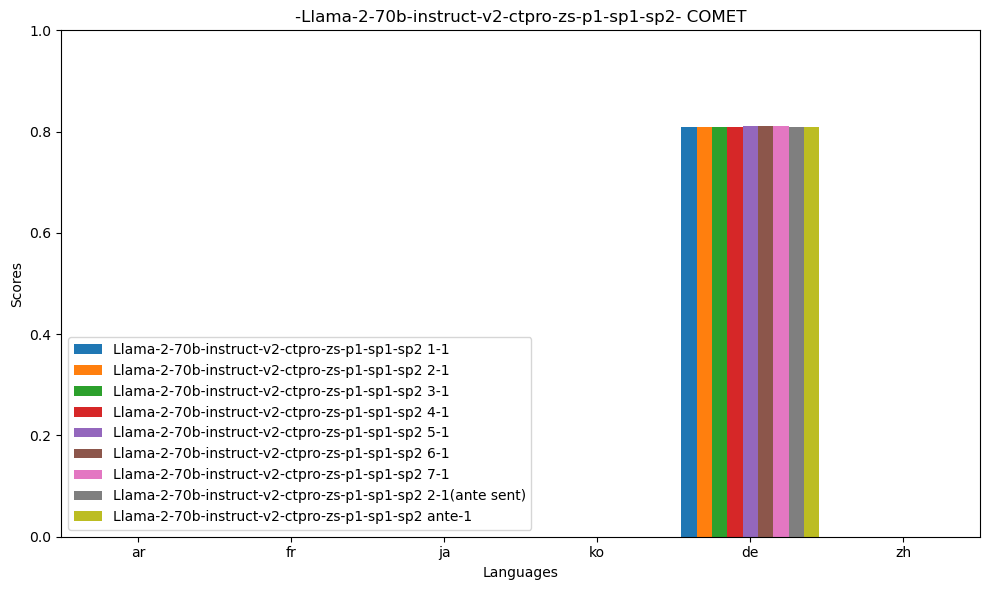

yes
equivalent 1-1 exists


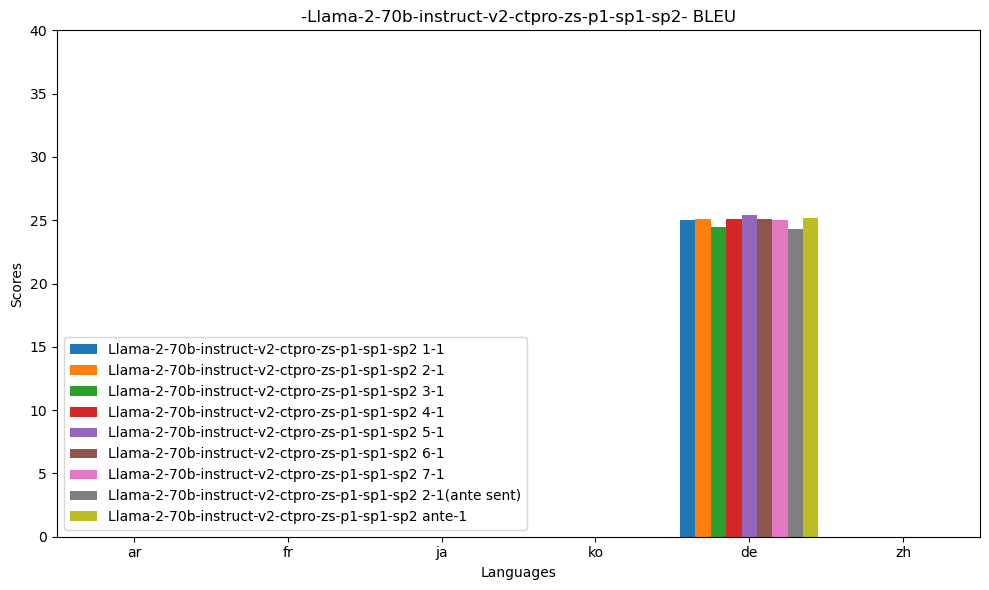

In [132]:
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0,1), bleu=(0,40))

yes
equivalent 1-1 exists


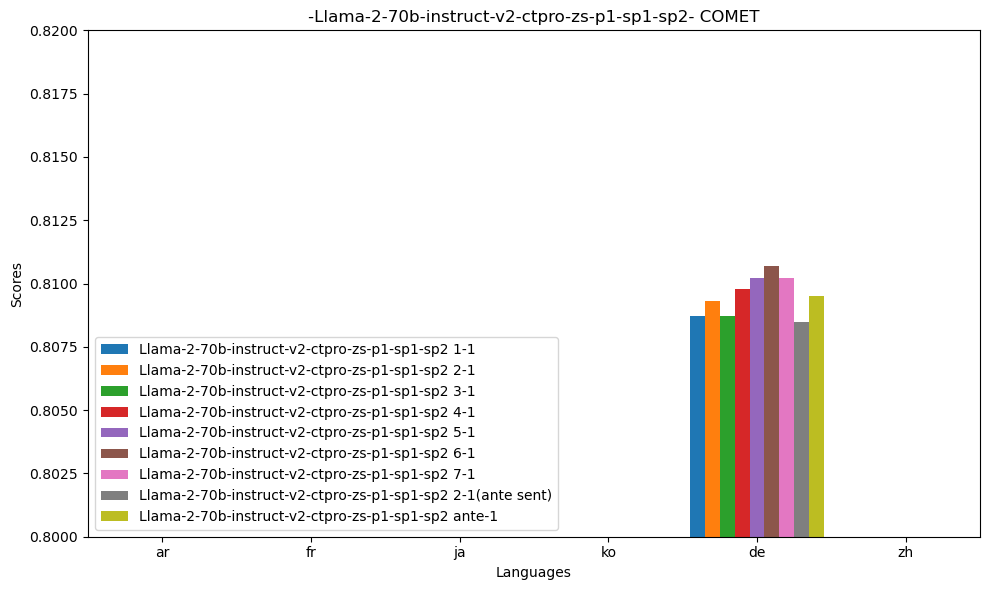

yes
equivalent 1-1 exists


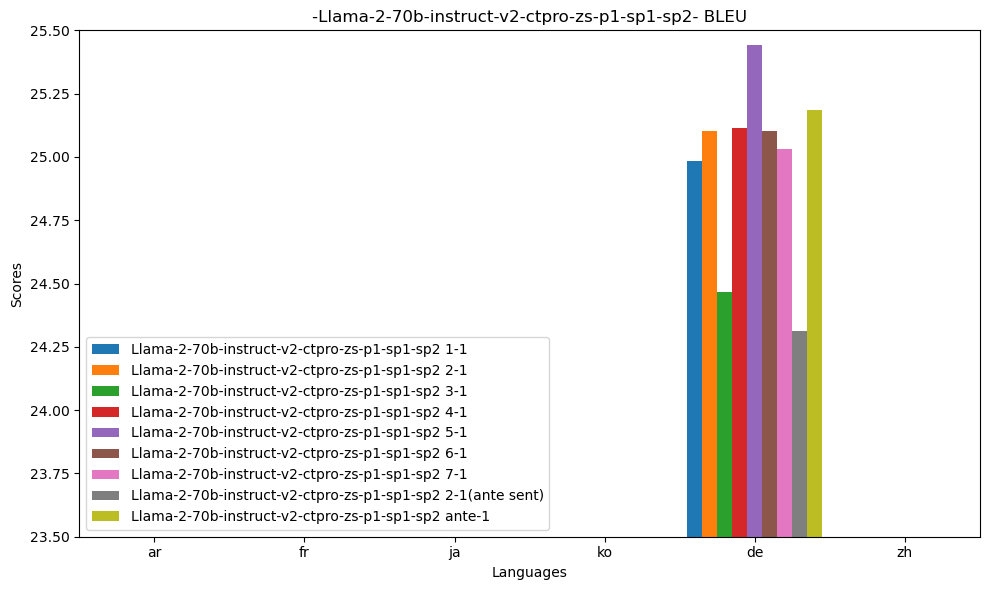

In [134]:
scores_plot("Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", comet=(0.8,0.82), bleu=(23.5,25.5))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

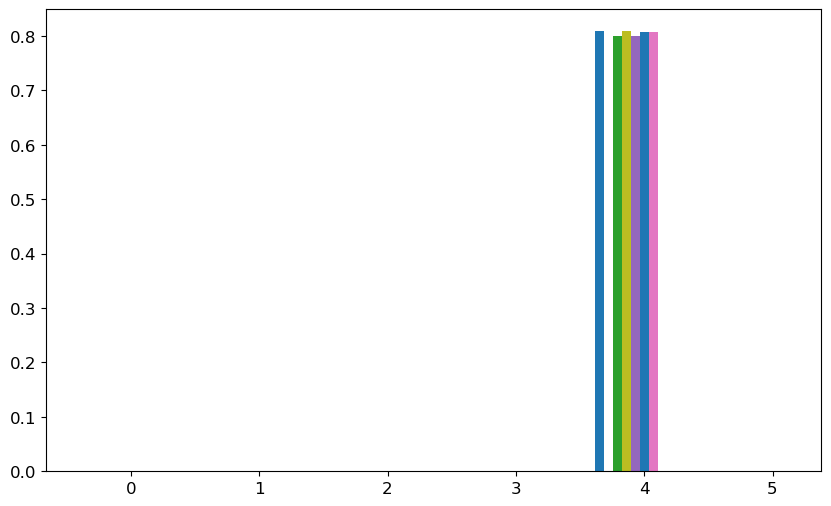

In [77]:
scores_plot(model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta", base_model="Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2", relative=False, category=None, comet=(0,1), bleu=(0,40), fontsize=12, right_adjust=0.8)

# TED Prompt1 

1-3 [0, 0.0012999999999999678, 0.0025999999999999357, 0.0050000000000000044, 0.0008000000000000229, 0.0036000000000000476]
1-4 [0, 0.00019999999999997797, 0.00039999999999995595, 0.007300000000000084, 0.0030999999999999917, -9.999999999998899e-05]


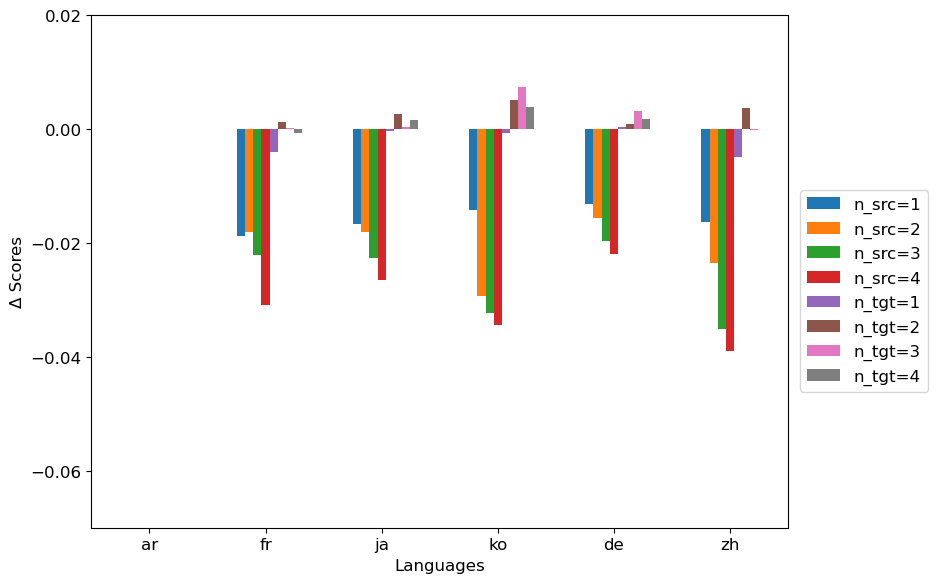

[0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, -3.5605000000000047, -2.2803000000000004, -1.5155999999999992, -3.710699999999999, -6.6416]
[0, -3.712200000000003, -3.1722, -4.239599999999999, -3.7605000000000004, -6.3645]
[0, -5.992800000000003, -4.3603000000000005, -4.8919, -4.787299999999998, -10.4255]
[0, -10.140400000000003, -5.284400000000001, -6.224500000000001, -7.4984, -11.901400000000002]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, -2.6433000000000035, -0.5175000000000001, 0.10330000000000084, -0.09969999999999857, -2.0151000000000003]
[0, 0.03439999999999799, 0.020199999999999108, 0.3926999999999996, -0.6585999999999999, -0.15889999999999915]
1-3 [0, 0.03439999999999799, 0.020199999999999108, 0.3926999999999996, -0.6585999999999999, -0.15889999999999915]
[0, -0.11060000000000514, -0.4746000000000006, 0.6021999999999998, -0.2256999999999998, -1.05170000000000

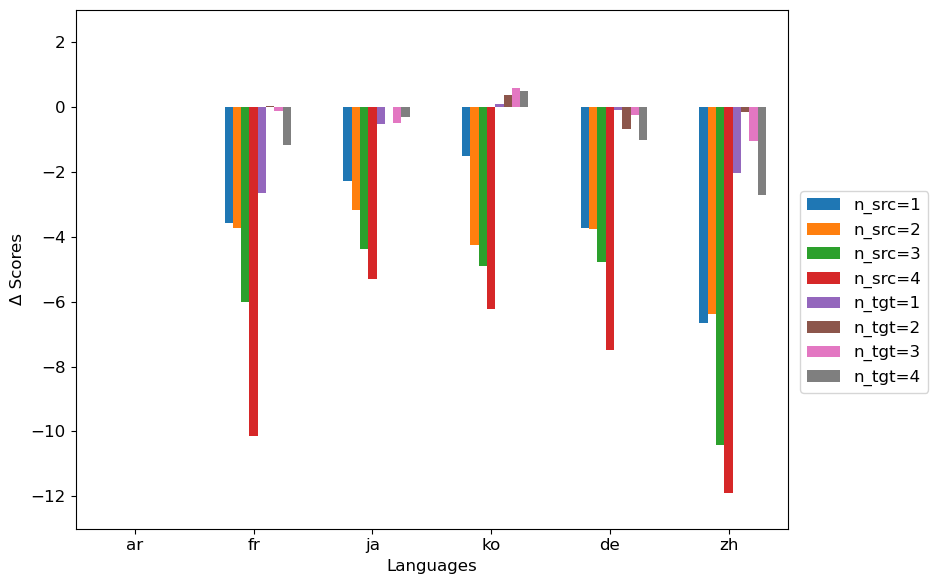

In [7]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "formality", relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.07,0.02), bleu=(-13,3), fontsize=12, right_adjust=0.75) 

1-3 [0.012199999999999989, 0.0010000000000000009, -0.007900000000000018, 0, 0.0027000000000000357, 0]
1-4 [-0.0019000000000000128, 0.0013000000000000789, -0.0040000000000000036, 0, 0.0018000000000000238, 0]


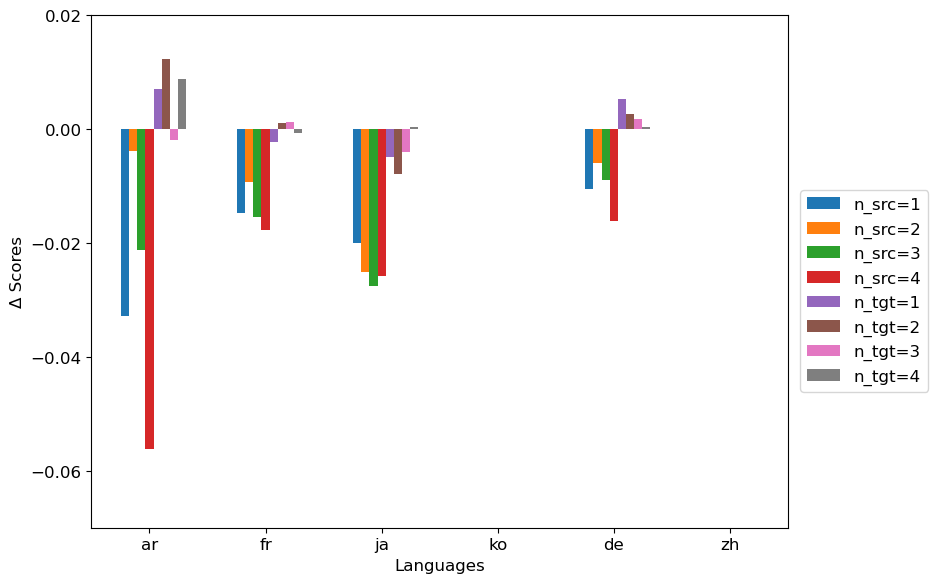

[0.0, 0.0, 0.0, 0, 0.0, 0]
[-1.4868000000000006, -3.1277000000000044, -2.716000000000001, 0, -6.200600000000001, 0]
[-1.720600000000001, -2.2430999999999983, -4.663300000000001, 0, -2.2592, 0]
[-1.7553, -5.261600000000001, -4.836400000000001, 0, -3.2667, 0]
[-6.1719, -7.855700000000002, -5.0411, 0, -5.9715000000000025, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1.2940000000000005, -2.1713999999999984, 0.5881999999999987, 0, -0.5945999999999998, 0]
[0.4229000000000003, 0.29359999999999786, 0.10309999999999953, 0, -0.45560000000000045, 0]
1-3 [0.4229000000000003, 0.29359999999999786, 0.10309999999999953, 0, -0.45560000000000045, 0]
[-2.2803000000000004, 0.6259000000000015, -1.8024000000000004, 0, 0.5721999999999952, 0]
[0.4367000000000001, -0.09920000000000329, -0.08910000000000018, 0, 0.002200000000001978, 0]


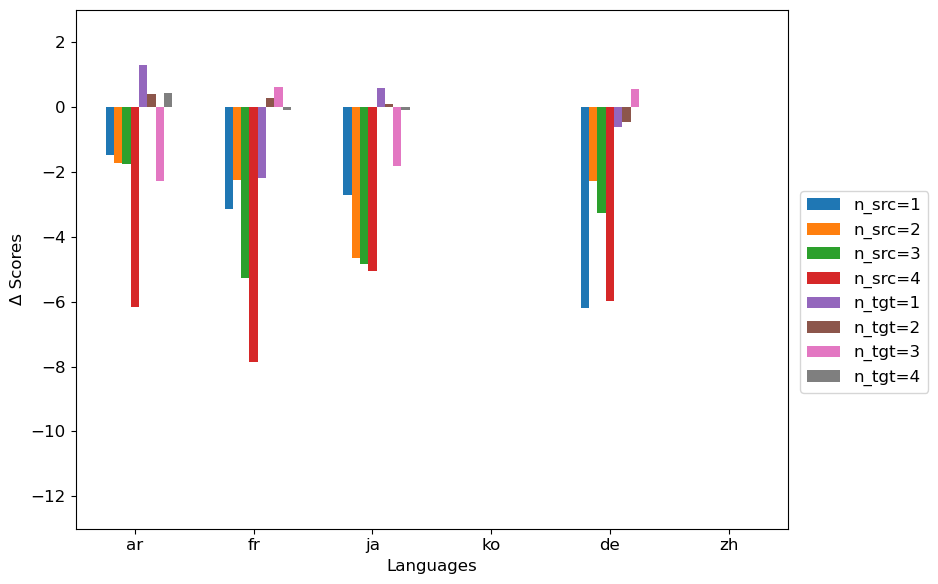

In [8]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "pronouns", relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.07,0.02), bleu=(-13,3), fontsize=12, right_adjust=0.75) 

1-3 [0.0034000000000000696, -0.0025000000000000577, 0.0032999999999999696, 0.006300000000000083, 0.0013999999999999568, 0.0050000000000000044]
1-4 [0.0013000000000000789, 0.00039999999999995595, -9.999999999998899e-05, 0.010099999999999998, 0.0025999999999999357, 0.009299999999999975]


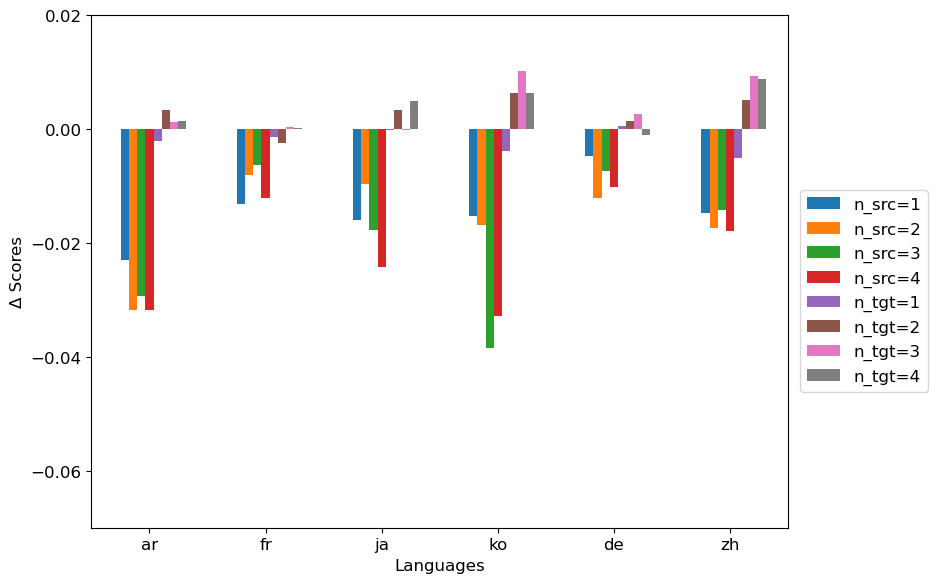

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-2.7432999999999996, -4.008899999999997, -2.5998, -3.5882000000000005, -2.101499999999998, -7.500399999999999]
[-6.9869, -3.3744000000000014, -3.1669, -4.0982, -2.5716, -6.1240999999999985]


[-6.824399999999999, -2.6693, -5.1122, -5.438599999999999, -2.3855000000000004, -7.989000000000001]
[-7.1084, -4.255699999999997, -5.653600000000001, -6.996, -3.5182, -10.912499999999998]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0.08610000000000184, -1.9557000000000002, -0.2571999999999992, 0.0555000000000021, -0.7453000000000003, -4.331499999999998]
[-0.6790999999999983, -1.2764000000000024, 0.8583999999999996, 1.2996000000000016, 0.2928999999999995, 0.6850999999999985]
1-3 [-0.6790999999999983, -1.2764000000000024, 0.8583999999999996, 1.2996000000000016, 0.2928999999999995, 0.6850999999999985]
[-1.2339999999999982, -0.6037999999999997, 0.6021000000000001, 2.1468999999999987, 0.5757000000000012, 1.4055999999999997]
[0.17940000000000111, 0.29590000000000316, -0.36050000000000004, 2.4764000000000017, 0.3048000000000002, 2.0106000000000037]


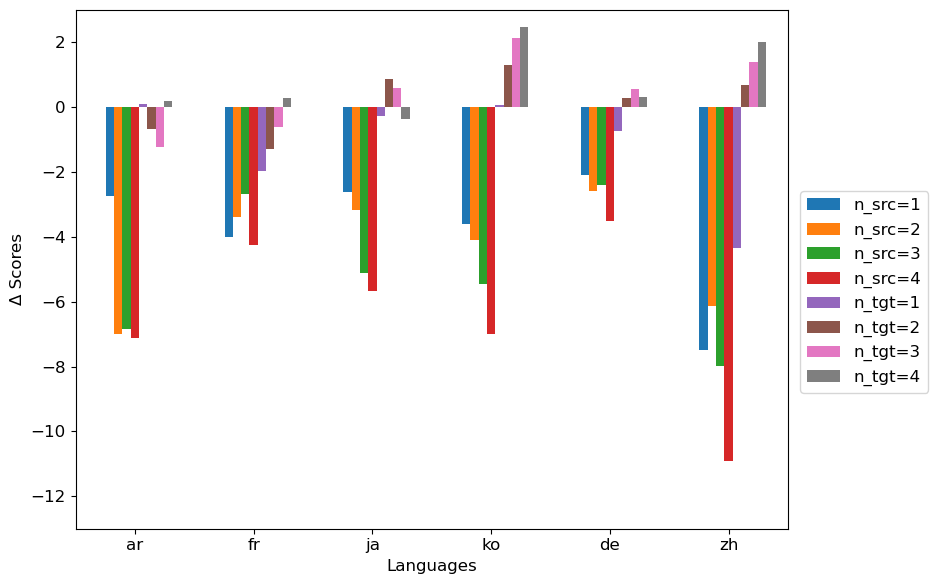

In [9]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "lexical_cohesion", relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.07,0.02), bleu=(-13,3), fontsize=12, right_adjust=0.75) 

1-3 [0, 0.0013999999999999568, 0, 0, 0, 0]
1-4 [0, 0.0015000000000000568, 0, 0, 0, 0]


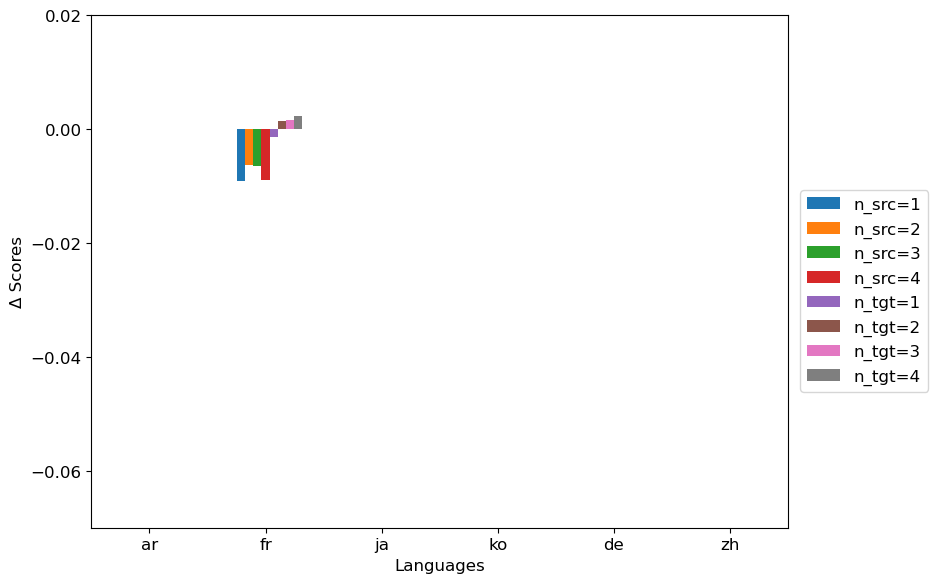

[0, 0.0, 0, 0, 0, 0]
[0, -2.118300000000005, 0, 0, 0, 0]
[0, -2.3530000000000015, 0, 0, 0, 0]
[0, -3.0058000000000007, 0, 0, 0, 0]
[0, -4.550400000000003, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, -0.7735000000000056, 0, 0, 0, 0]
[0, -0.8170000000000002, 0, 0, 0, 0]
1-3 [0, -0.8170000000000002, 0, 0, 0, 0]
[0, 0.5823999999999998, 0, 0, 0, 0]
[0, 0.7934999999999945, 0, 0, 0, 0]


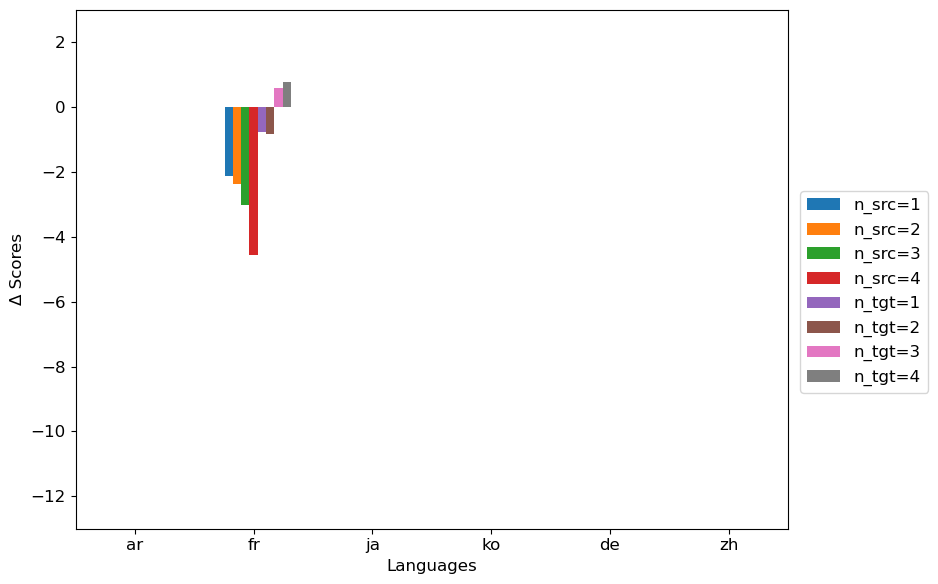

In [10]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "verb_form", relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.07,0.02), bleu=(-13,3), fontsize=12, right_adjust=0.75) 

1-3 [0.0031999999999999806, 0.0013999999999999568, 0.0015999999999999348, 0.0018000000000000238, 0.000300000000000078, 0.0012999999999999678]
1-4 [0.0023999999999999577, 0.0019000000000000128, 0.00019999999999997797, 0.0016000000000000458, 0.0008000000000000229, 0.0023999999999999577]


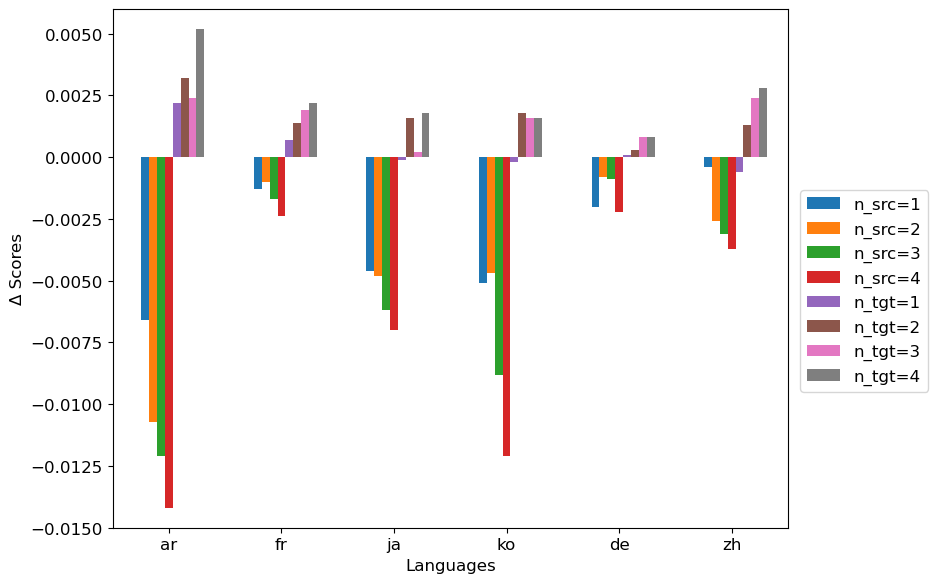

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-1.2834000000000003, -0.4258999999999986, -0.43950000000000067, -1.2560999999999982, -0.3725999999999985, -1.3557999999999986]
[-2.2013, -0.3049000000000035, -0.6846999999999994, -1.2301999999999982, -0.6589999999999989, -1.2454]
[-2.2139000000000006, -0.416400000000003, -0.7767, -2.0874999999999986, -0.053300000000000125, -2.4182999999999986]
[-2.5647, -0.7094999999999985, -1.1128, -3.1564999999999994, -0.36699999999999733, -2.3308]
[0, 0, -1.6058000000000003, 0, 0, 0]
[0, 0, -1.4527, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, -2.263299999999999, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[-0.5621000000000009, -0.07430000000000092, -0.43629999999999924, 0.45810000000000173, -0.2154999999999987, -1.2387999999999977]
[0.3440999999999992, -0.5737000000000023, -0.3028999999999993, 0.6689000000000007, -0.4427999999999983, -0.3371999999999993]
1-3 [0.3440999999999992, -0.5737000000000023, -0.302899999999

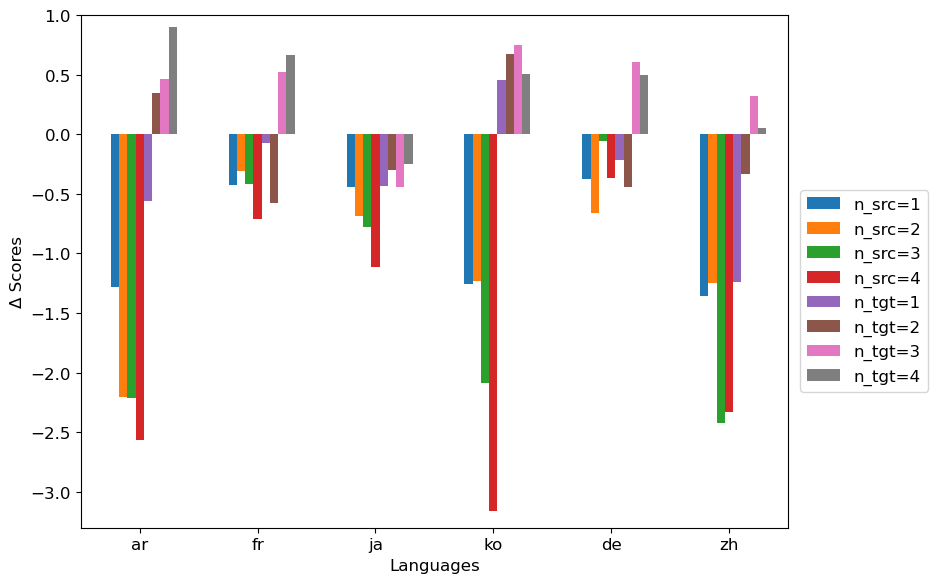

In [11]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = None, relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.015,0.006), bleu=(-3.3,1),fontsize=12, right_adjust=0.75) 

1-4 [0.0023999999999999577, 0.0019000000000000128, 0.00019999999999997797, 0.0016000000000000458, 0.0008000000000000229, 0.0023999999999999577]


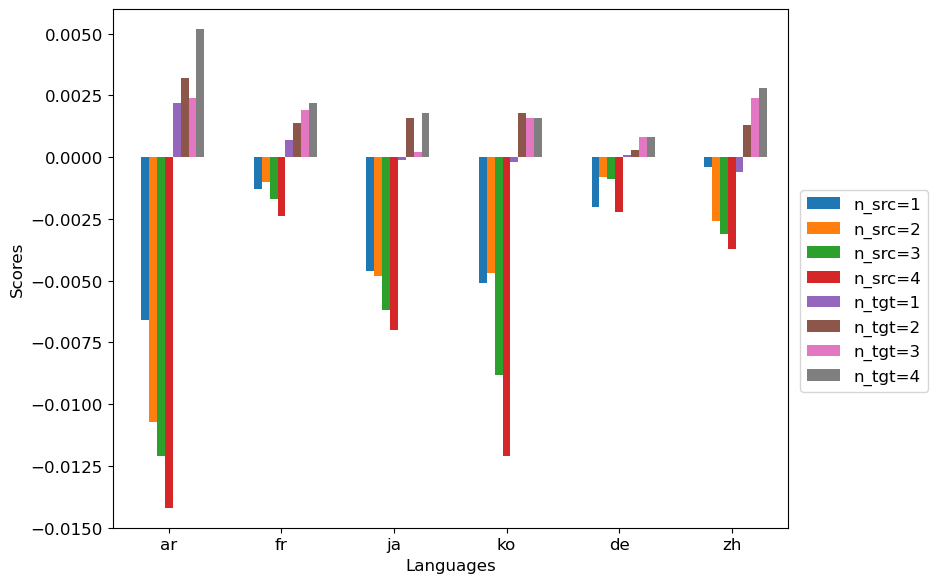

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-1.2834000000000003, -0.4258999999999986, -0.43950000000000067, -1.2560999999999982, -0.3725999999999985, -1.3557999999999986]
[-2.2013, -0.3049000000000035, -0.6846999999999994, -1.2301999999999982, -0.6589999999999989, -1.2454]
[-2.2139000000000006, -0.416400000000003, -0.7767, -2.0874999999999986, -0.053300000000000125, -2.4182999999999986]
[-2.5647, -0.7094999999999985, -1.1128, -3.1564999999999994, -0.36699999999999733, -2.3308]
[0, 0, -1.6058000000000003, 0, 0, 0]
[0, 0, -1.4527, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[]
[0, 0, -2.263299999999999, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[-0.5621000000000009, -0.07430000000000092, -0.43629999999999924, 0.45810000000000173, -0.2154999999999987, -1.2387999999999977]
[0.3440999999999992, -0.5737000000000023, -0.3028999999999993, 0.6689000000000007, -0.4427999999999983, -0.3371999999999993]
[0.4596, 0.5229999999999961, -0.44629999999999903, 0.75220000

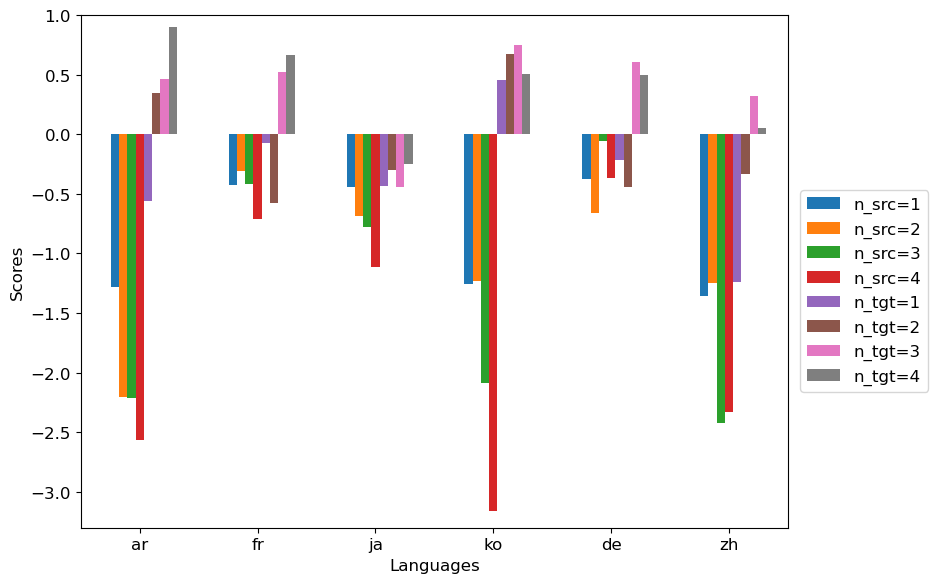

In [50]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = None, relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.015,0.006), bleu=(-3.3,1),fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.0, 0.8324, 0.8348, 0.0, 0.8299, 0.8096]


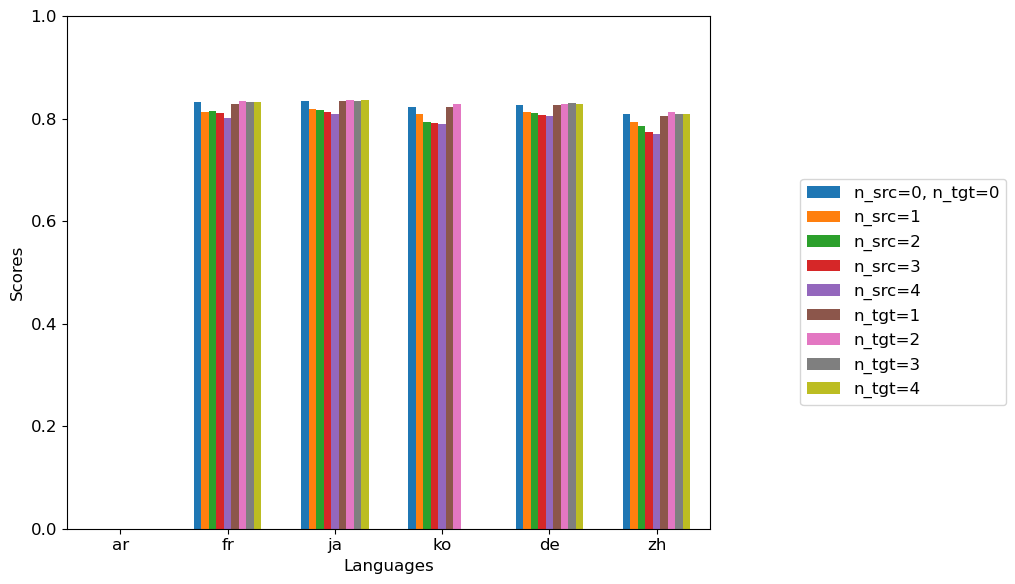

1-1 exists


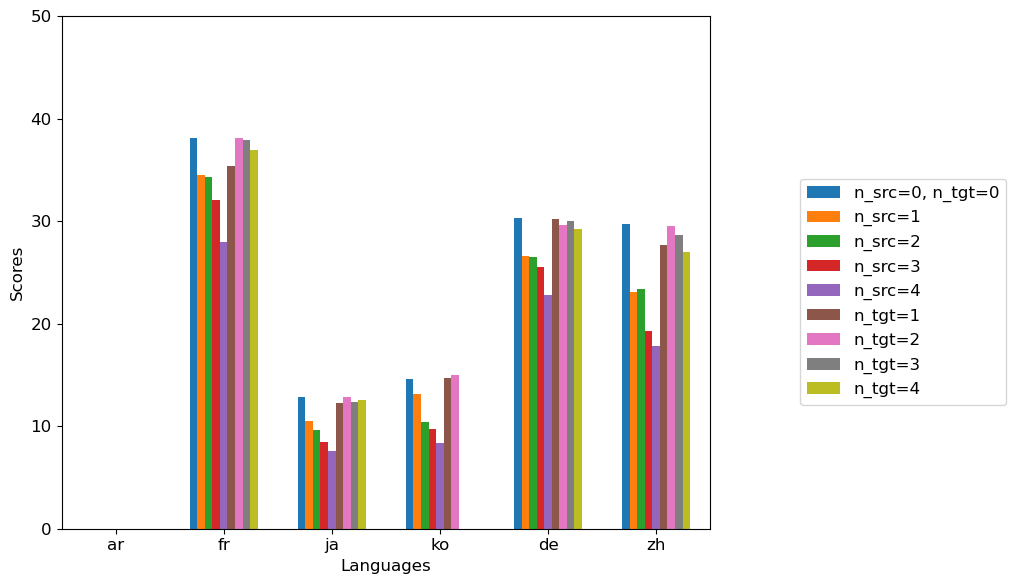

In [51]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "formality", relative = False, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.0, 0.8324, 0.8348, 0.0, 0.8299, 0.8096]


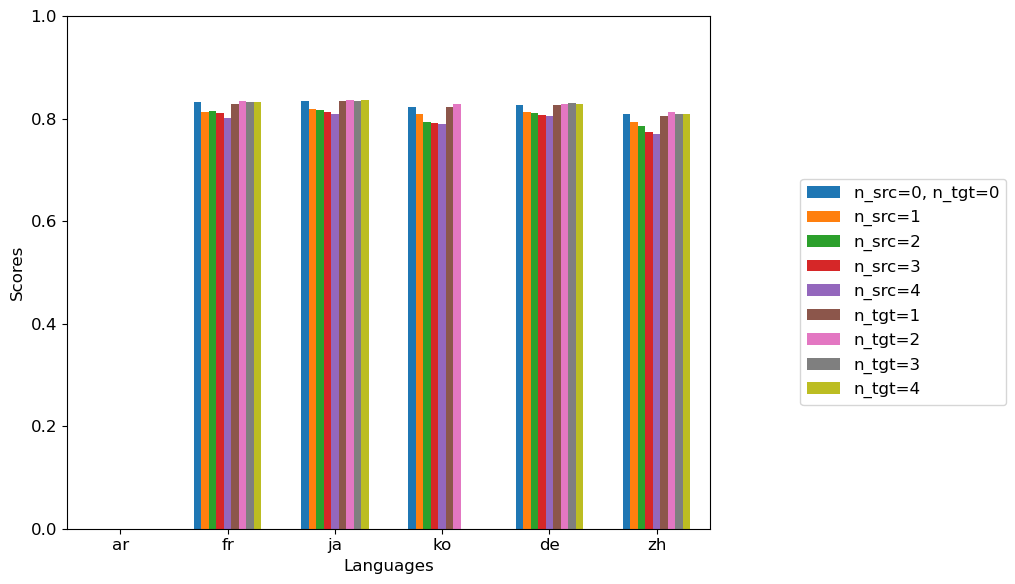

1-1 exists


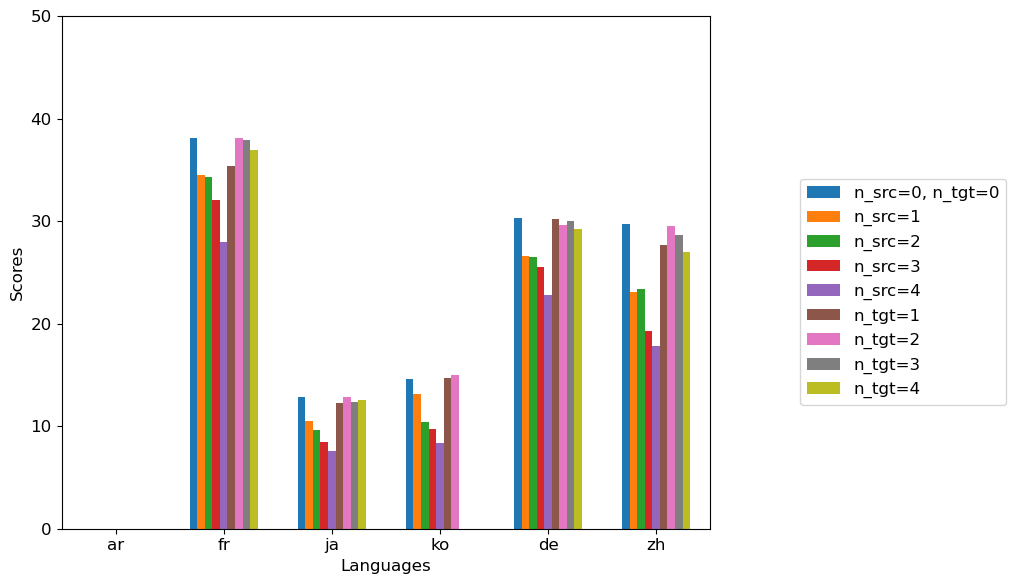

In [53]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = "formality", relative=False, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.7746, 0.8455, 0.8449, 0.0, 0.8356, 0.0]


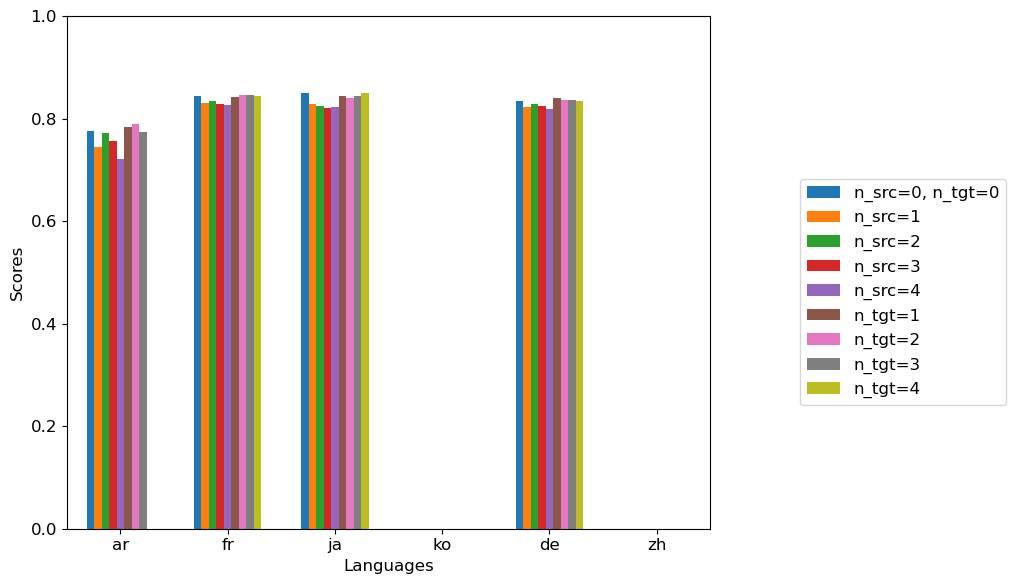

1-1 exists


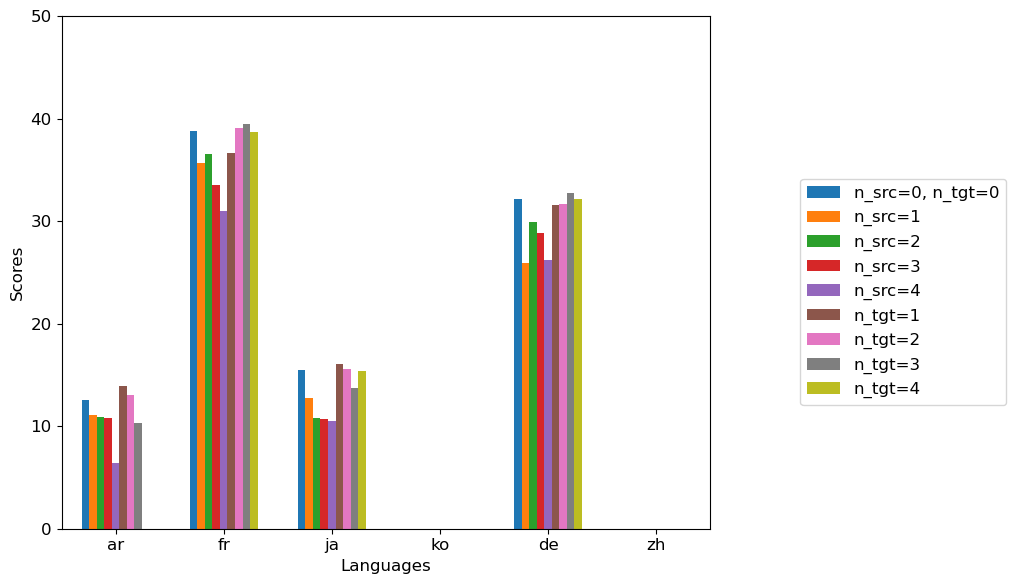

In [54]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", relative=False, category = "pronouns", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.7899, 0.8591, 0.8507, 0.0, 0.8472, 0.8459]


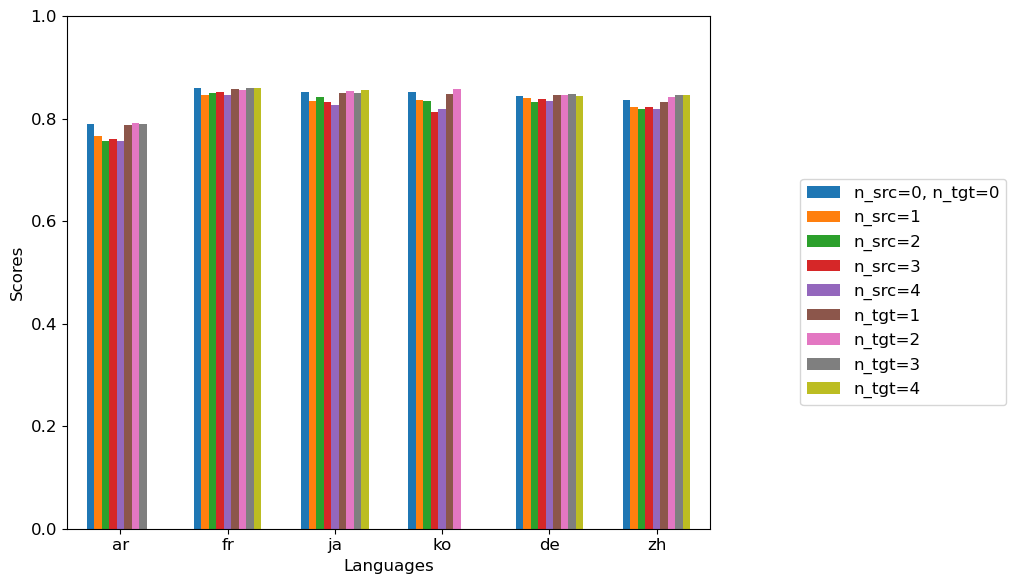

1-1 exists


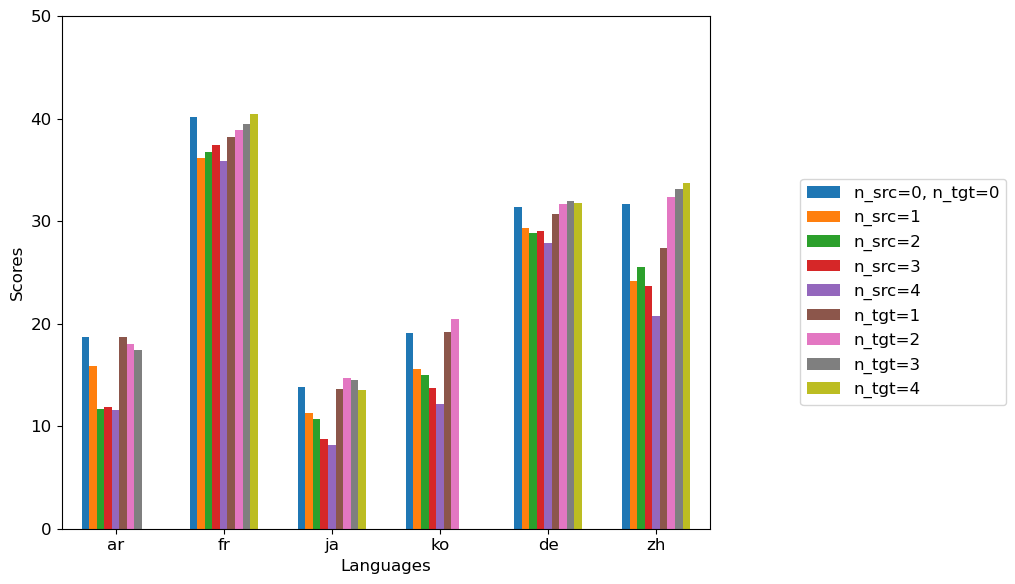

In [56]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", relative=False, category = "lexical_cohesion", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.0, 0.8463, 0.0, 0.0, 0.0, 0.0]


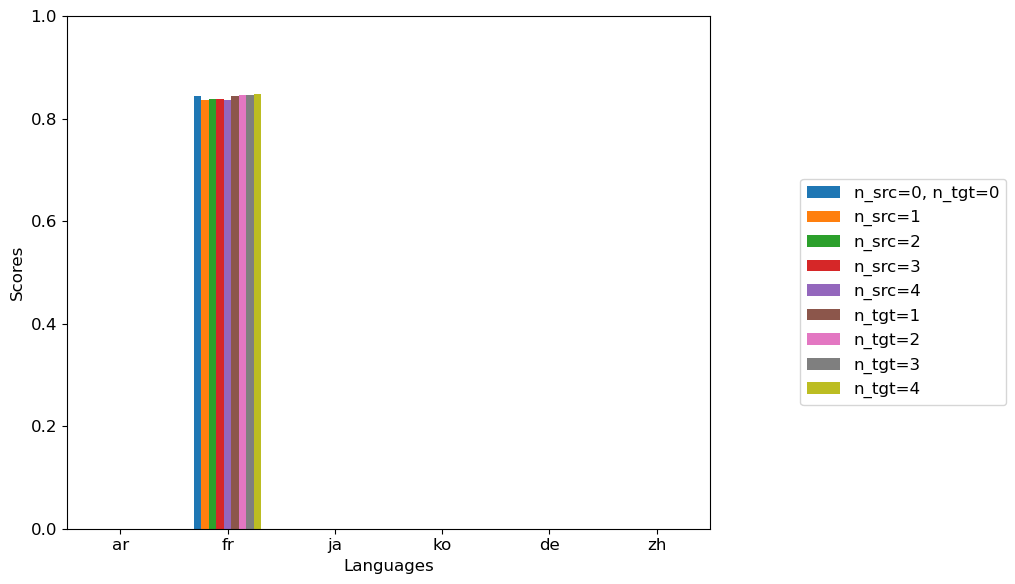

1-1 exists


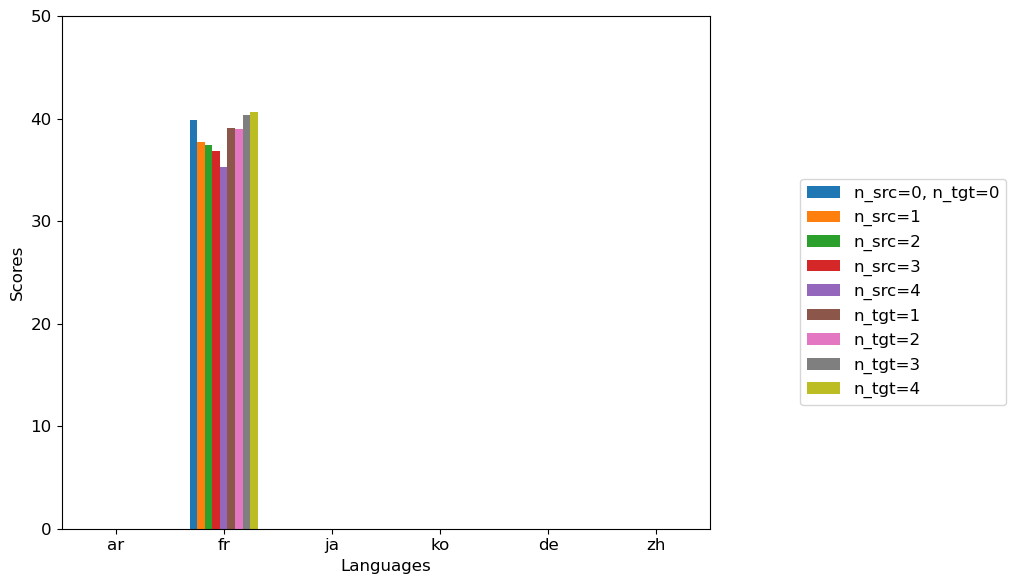

In [57]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", relative=False, category = "verb_form", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.7711, 0.8515, 0.8337, 0.8374, 0.8419, 0.8261]


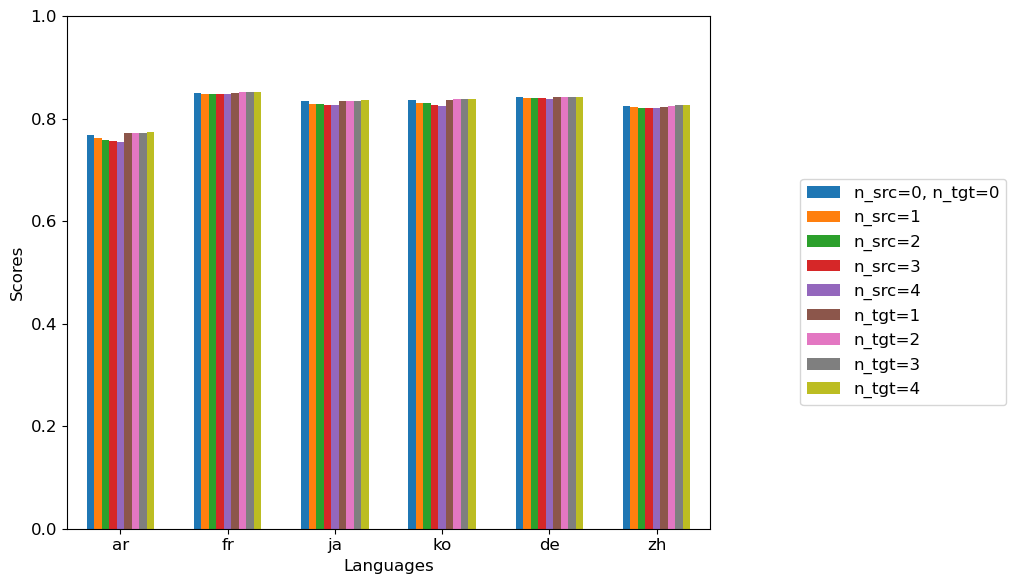

1-1 exists


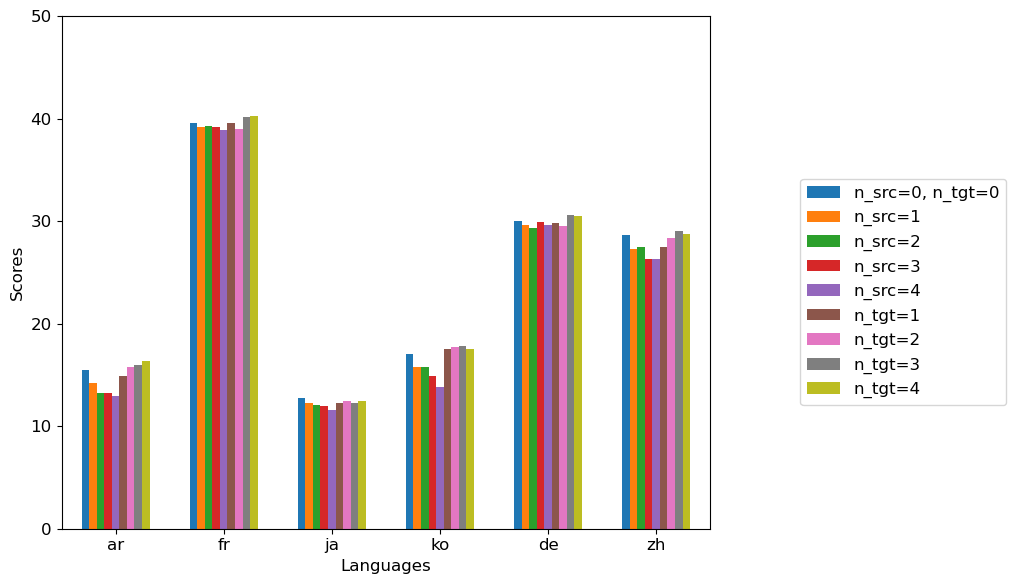

In [58]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category = None, relative=False, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.75) 

1-1 exists
1-4 [0.7711, 0.8515, 0.8337, 0.8374, 0.8419, 0.8261]


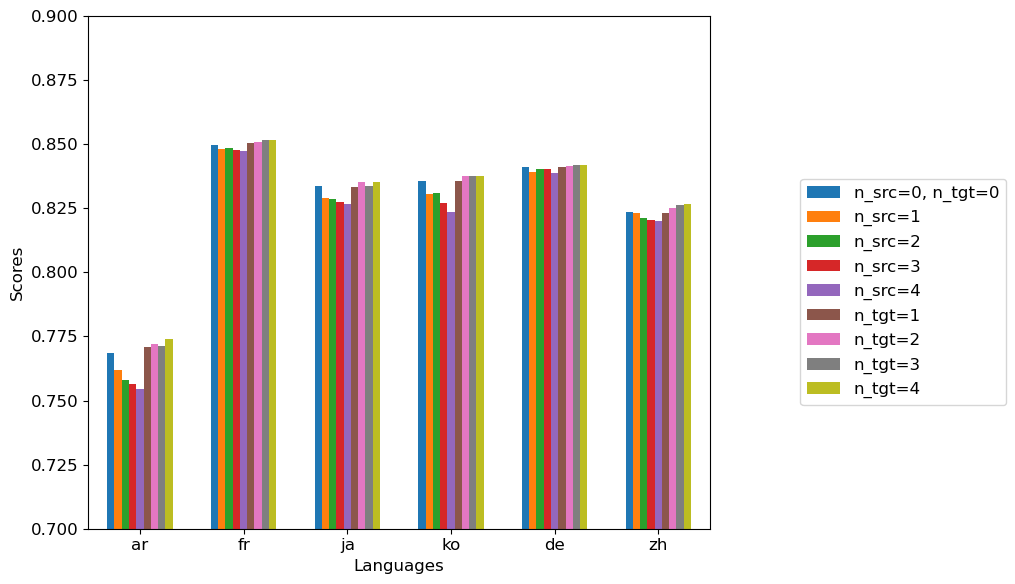

1-1 exists


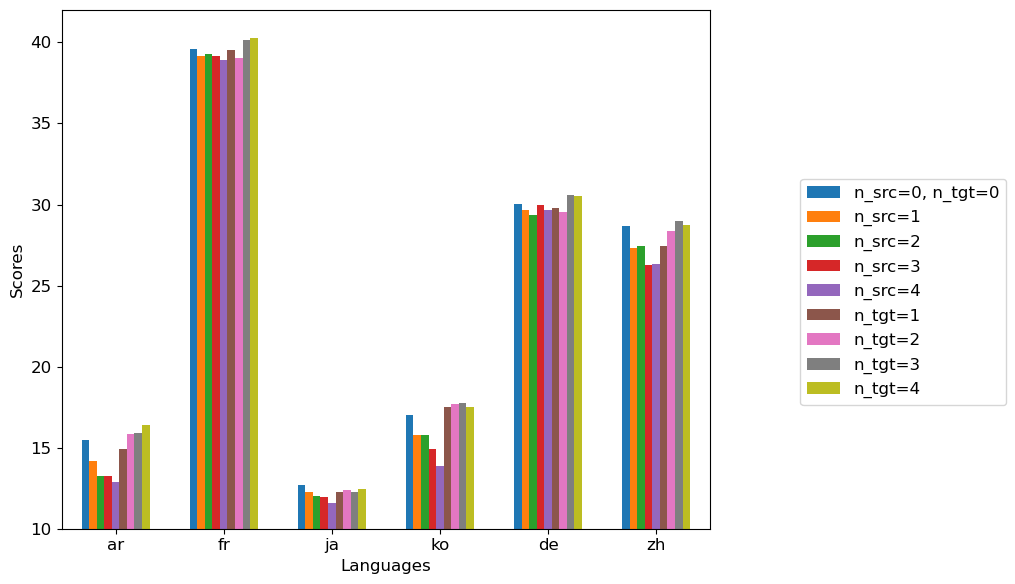

In [60]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", category=None, relative=False, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.7,0.9), bleu=(10,42), fontsize=12, right_adjust=0.75) 

equivalent 1-1 exists


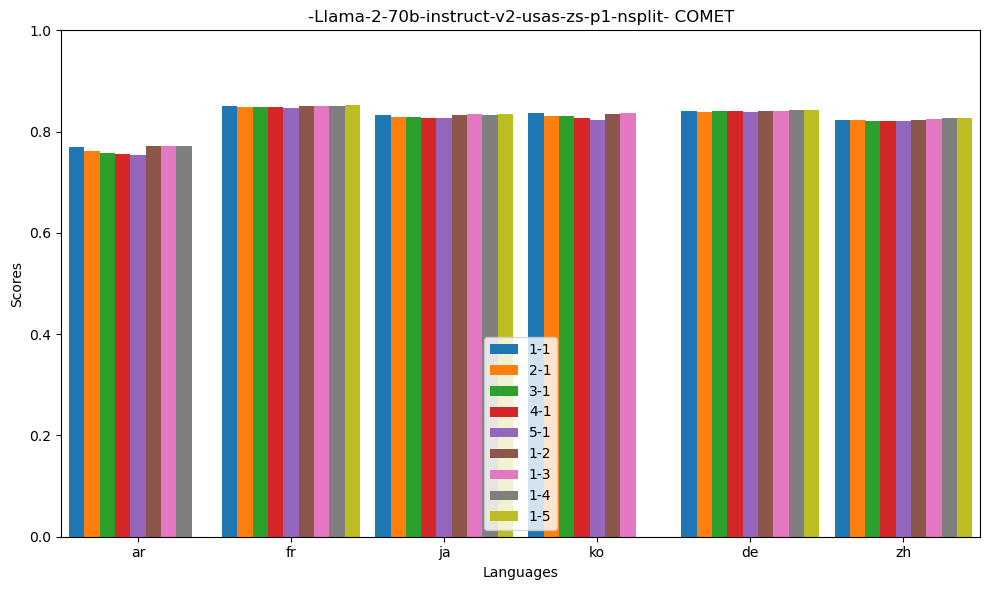

equivalent 1-1 exists


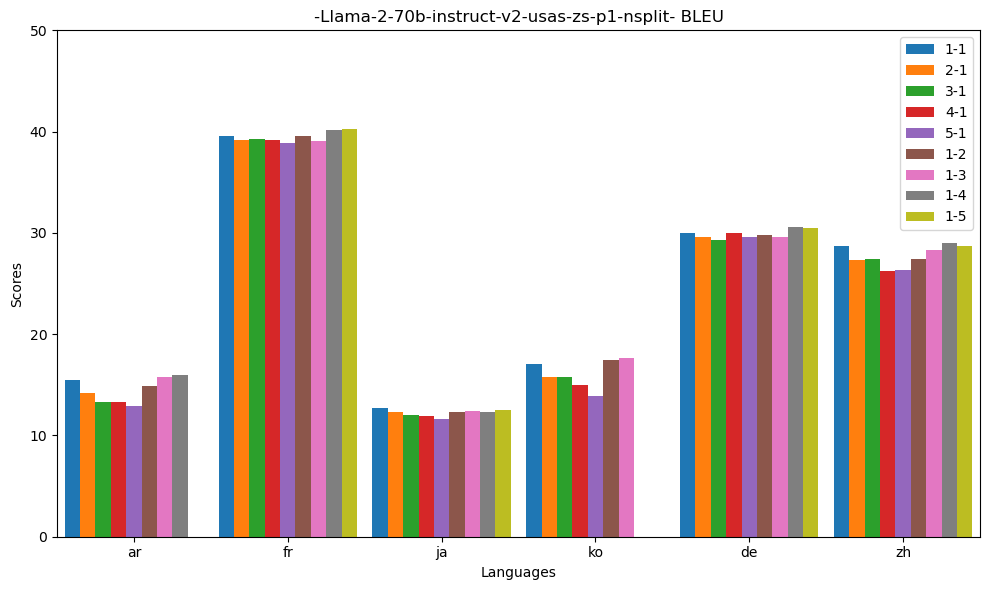

no
equivalent 1-1 exists


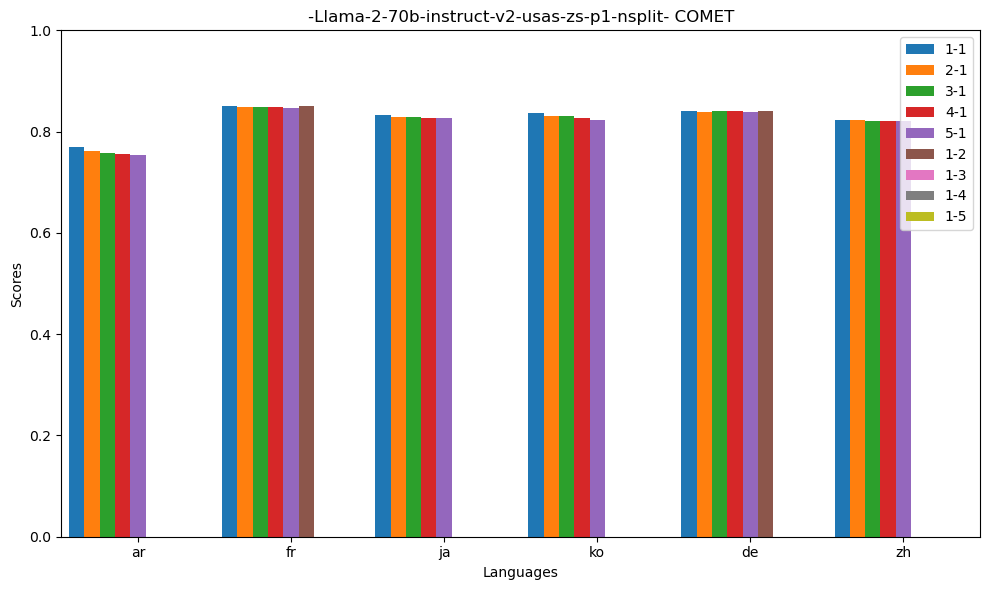

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


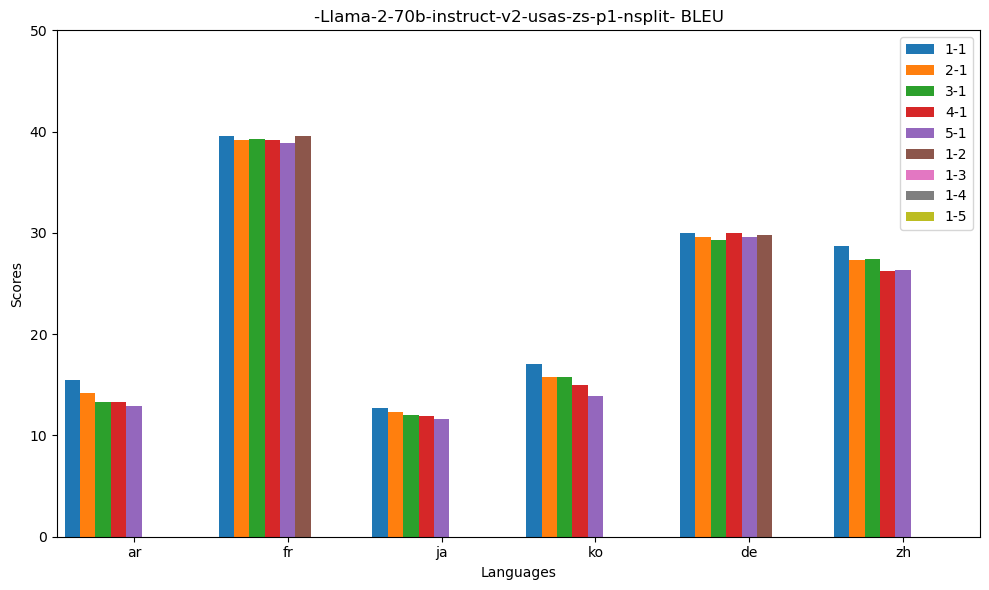

In [16]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50)) 

no
equivalent 1-1 exists


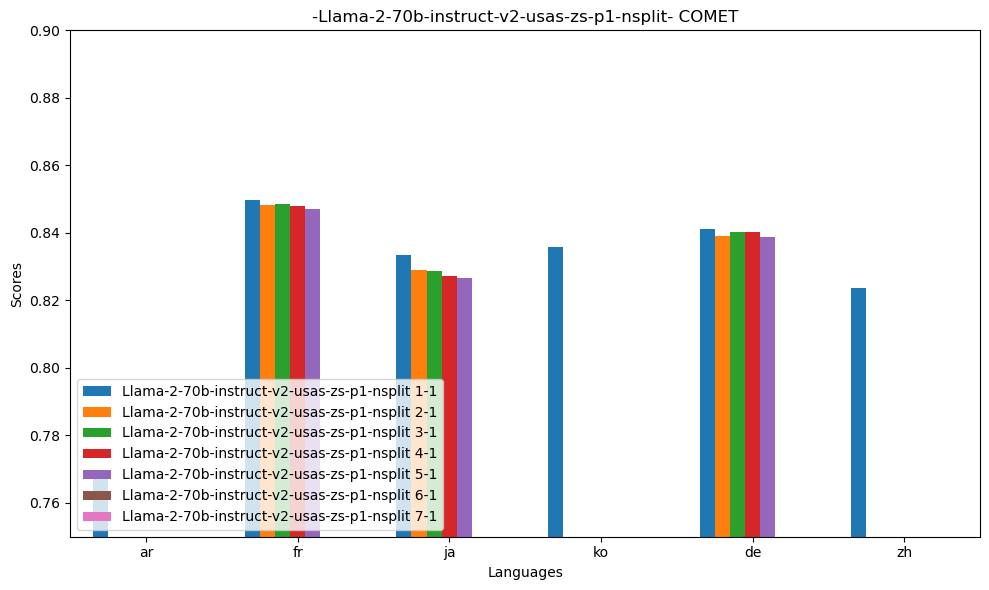

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no
no
no
no
no
no
no


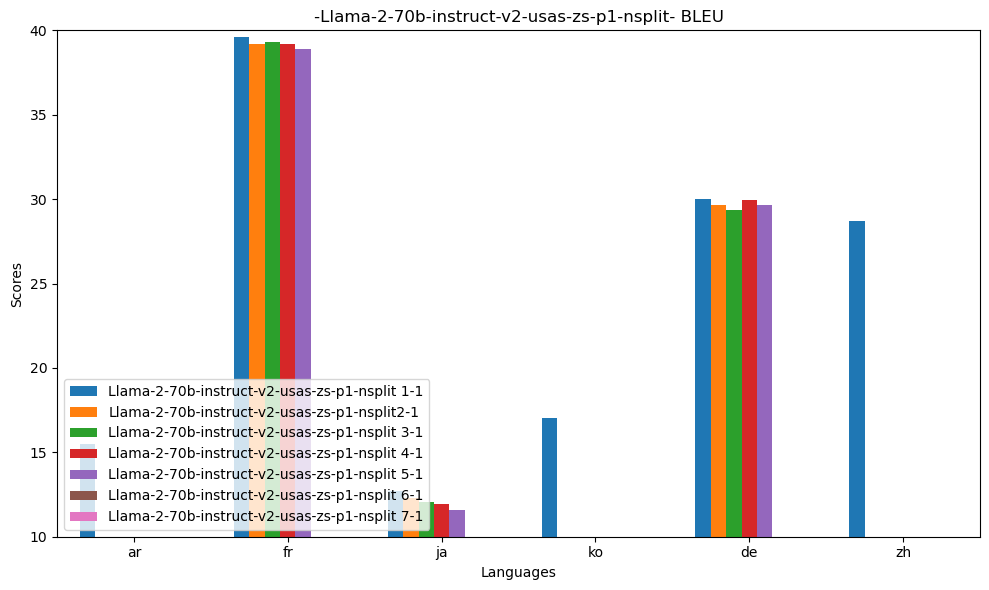

In [136]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


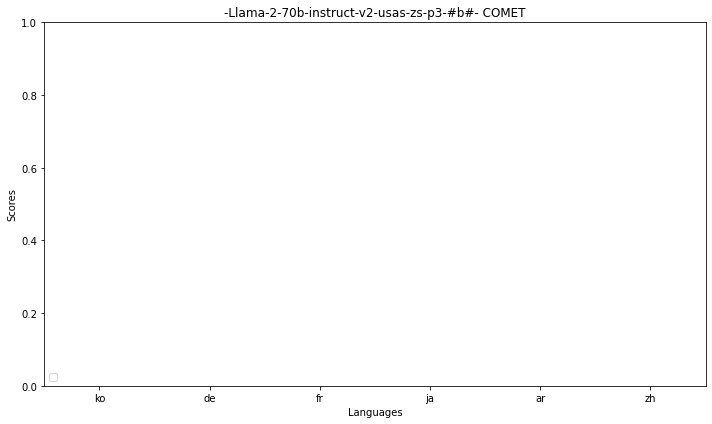

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


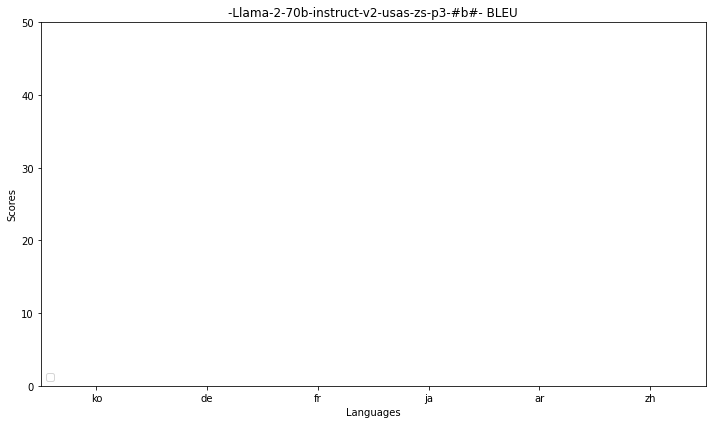

In [11]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '2-1', 'comet_scores': [0.0, 0.8507, 0.8351, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.8969, 12.1987, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '3-1', 'comet_scores': [0.0, 0.8505, 0.8336, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 39.7704, 12.5317, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '4-1', 'comet_scores': [0.0, 0.8503, 0.8322, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.0348, 12.6842, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '5-1', 'comet_scores': [0.0, 0.8488, 0.8303, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 40.6207, 13.0061, 0.0, 0.0, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#', 'scenario': '6-1', 'comet_score

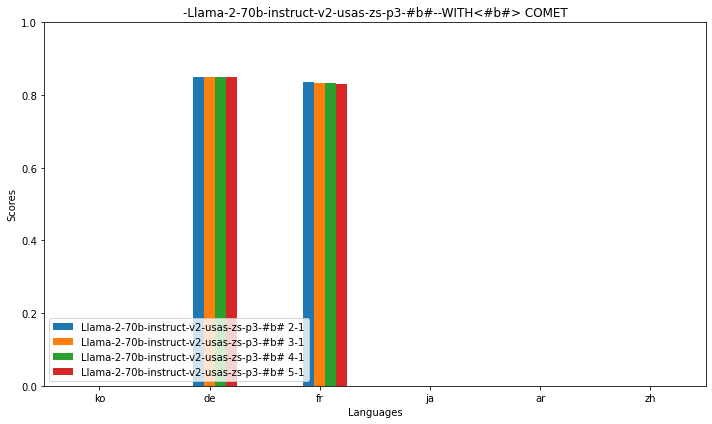

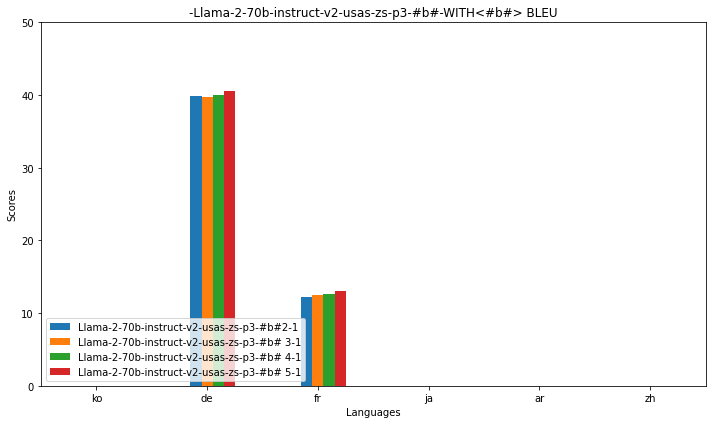

In [12]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#")

[{'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '1-1', 'comet_scores': [0.7687, 0.8496, 0.8335, 0.8358, 0.8411, 0.8237], 'bleu_scores': [15.4724, 39.5985, 12.7165, 17.0204, 30.0052, 28.6821]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.8483, 0.8289, 0.0, 0.8391, 0.0], 'bleu_scores': [0.0, 39.1726, 12.277, 0.0, 29.6326, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.8486, 0.8287, 0.0, 0.8403, 0.0], 'bleu_scores': [0.0, 39.2936, 12.0318, 0.0, 29.3462, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.8479, 0.8273, 0.0, 0.8402, 0.0], 'bleu_scores': [0.0, 39.1821, 11.9398, 0.0, 29.9519, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.8472, 0.8265, 0.0, 0.8389, 0.0], 'bleu_scores': [0.0, 38.889, 11.6037, 0.0, 29.6382, 0.0]}, {'model': 'Llama-2-70b-in

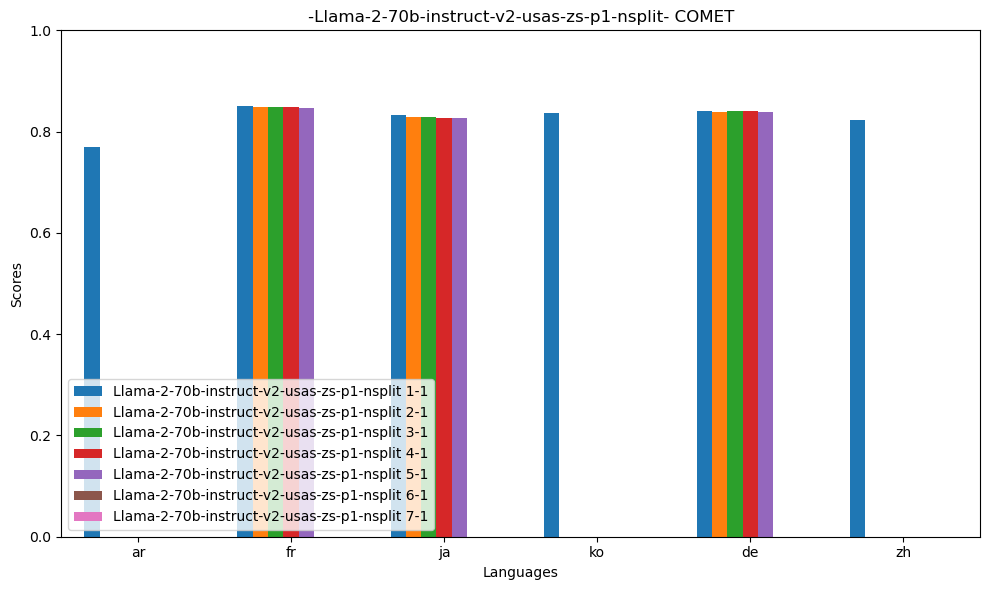

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no


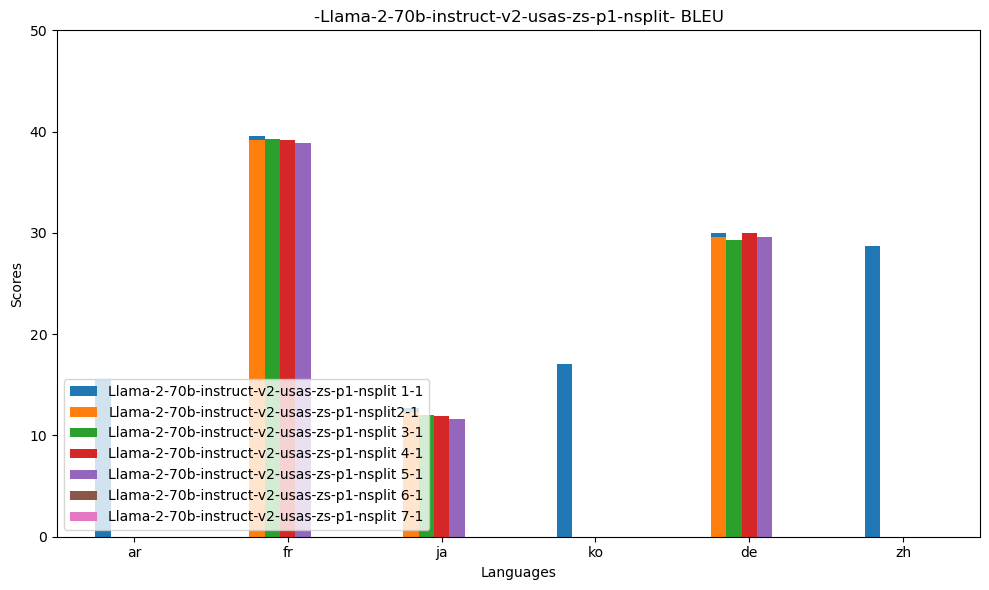

[{'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '1-1', 'comet_scores': [0.7687, 0.8496, 0.8335, 0.8358, 0.8411, 0.8237], 'bleu_scores': [15.4724, 39.5985, 12.7165, 17.0204, 30.0052, 28.6821]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.8483, 0.8289, 0.0, 0.8391, 0.0], 'bleu_scores': [0.0, 39.1726, 12.277, 0.0, 29.6326, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.8486, 0.8287, 0.0, 0.8403, 0.0], 'bleu_scores': [0.0, 39.2936, 12.0318, 0.0, 29.3462, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.8479, 0.8273, 0.0, 0.8402, 0.0], 'bleu_scores': [0.0, 39.1821, 11.9398, 0.0, 29.9519, 0.0]}, {'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.8472, 0.8265, 0.0, 0.8389, 0.0], 'bleu_scores': [0.0, 38.889, 11.6037, 0.0, 29.6382, 0.0]}, {'model': 'Llama-2-70b-in

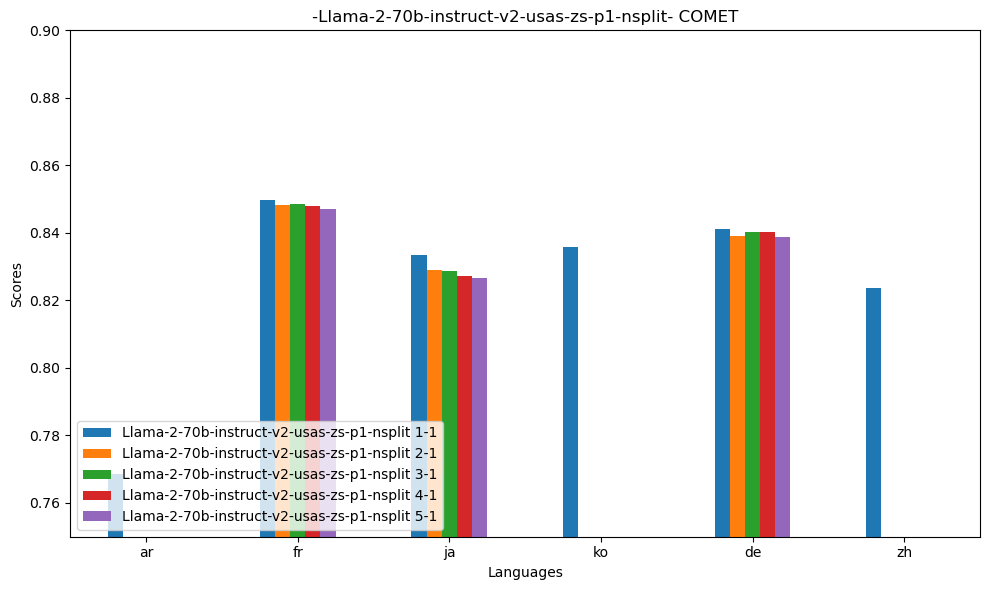

no
equivalent 1-1 exists
no
no
no
no
no
no
no
no


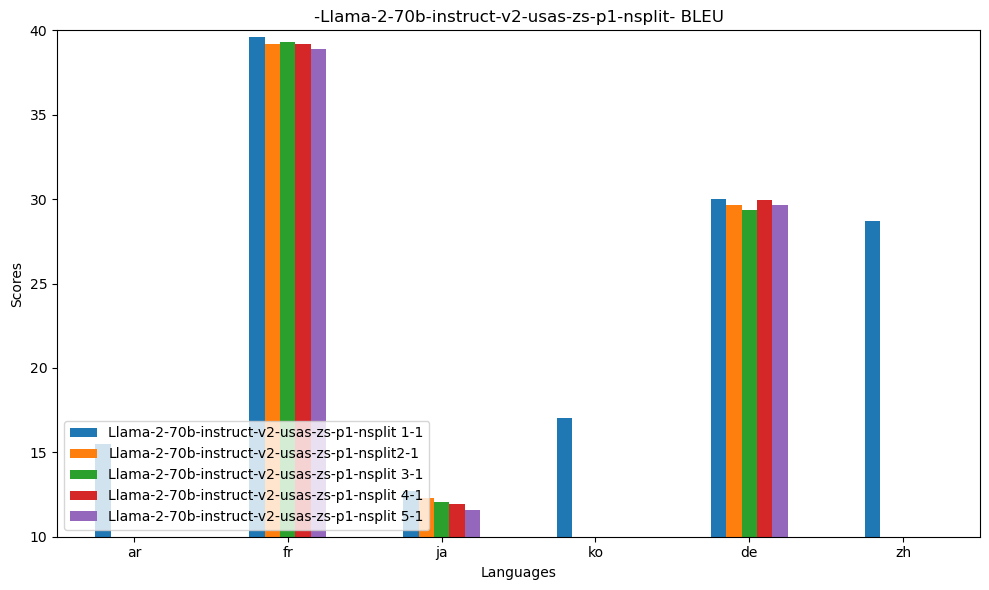

In [30]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

In [ ]:
scores_plot(model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0.75,0.9), bleu=(10,40)) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


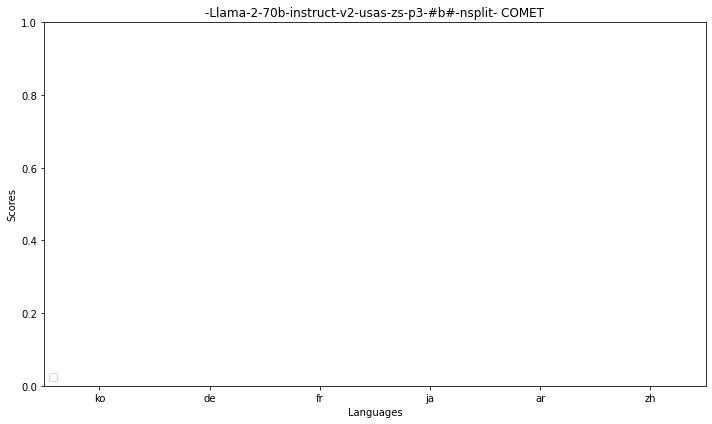

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


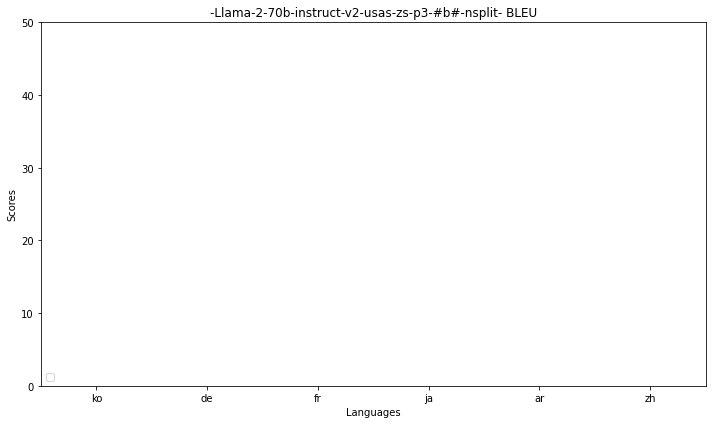

In [14]:
scores_plot("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
equivalent 1-1 does not exists
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '2-1', 'comet_scores': [0.0, 0.0, 0.8347, 0.0, 0.8429, 0.0], 'bleu_scores': [0.0, 0.0, 12.4581, 0.0, 29.9477, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '3-1', 'comet_scores': [0.0, 0.0, 0.833, 0.0, 0.8434, 0.0], 'bleu_scores': [0.0, 0.0, 12.5005, 0.0, 30.42, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '4-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8419, 0.0], 'bleu_scores': [0.0, 0.0, 12.6585, 0.0, 30.3739, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit', 'scenario': '5-1', 'comet_scores': [0.0, 0.0, 0.8312, 0.0, 0.8398, 0.0], 'bleu_scores': [0.0, 0.0, 13.1039, 0.0, 30.2057, 0.0]}
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p3-#b#-n

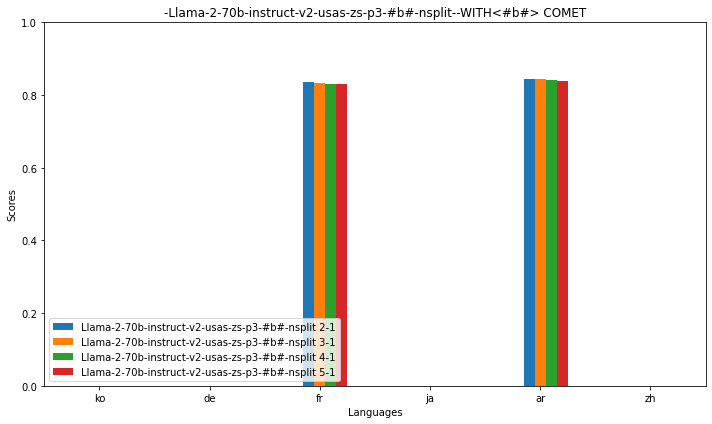

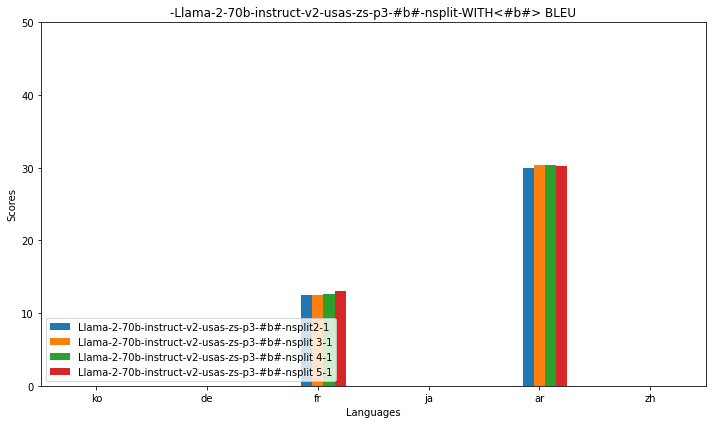

In [15]:
scores_plot_b("Llama-2-70b-instruct-v2-usas-zs-p3-#b#-nsplit")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


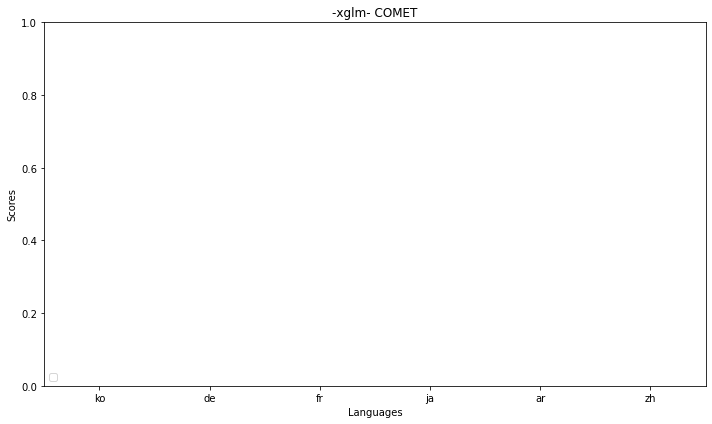

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


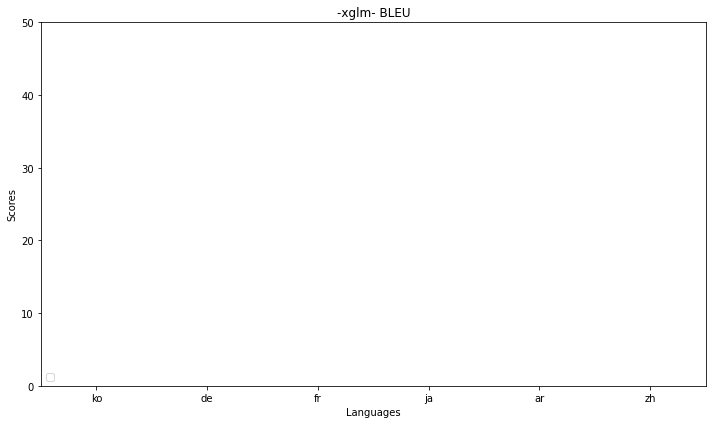

In [16]:
scores_plot("xglm")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


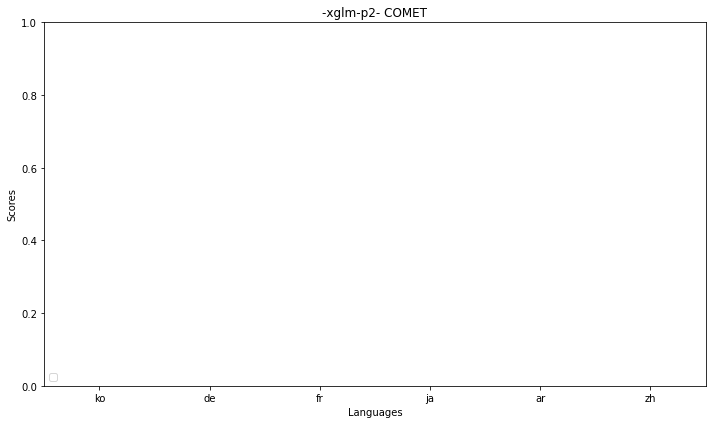

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


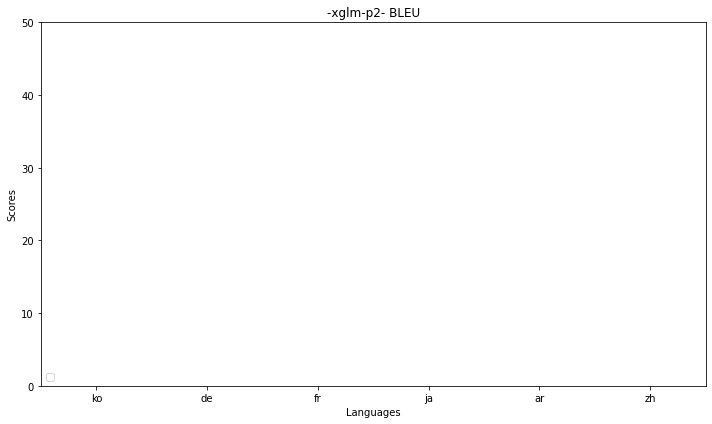

In [17]:
scores_plot("xglm-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


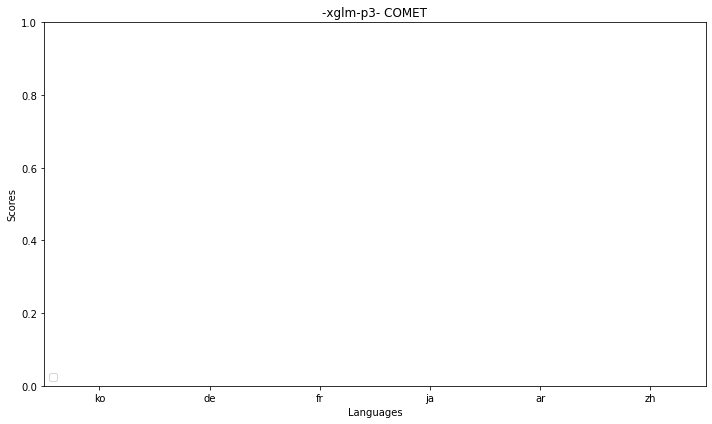

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


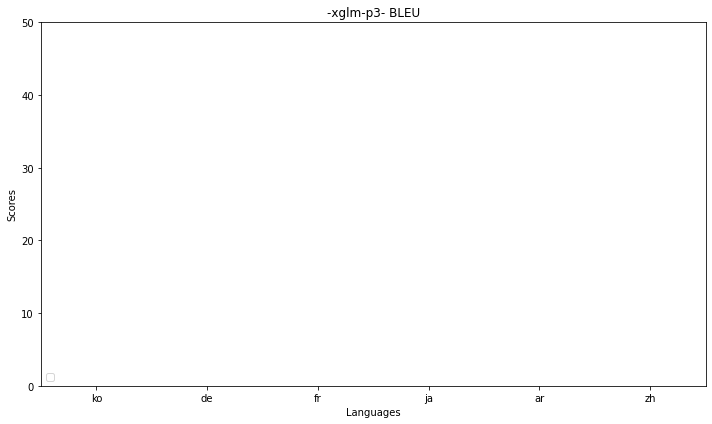

In [18]:
scores_plot("xglm-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


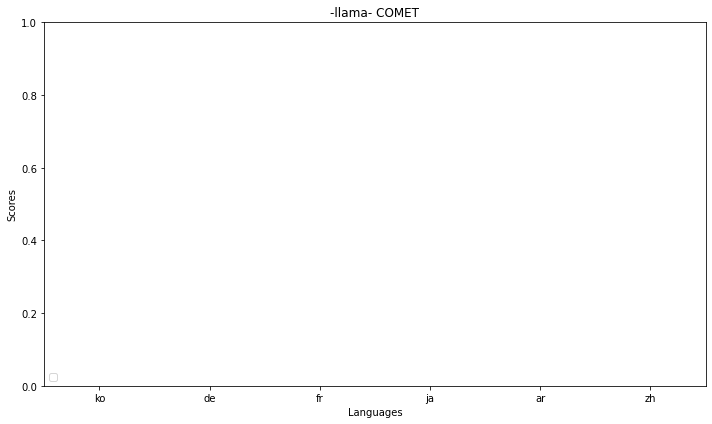

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


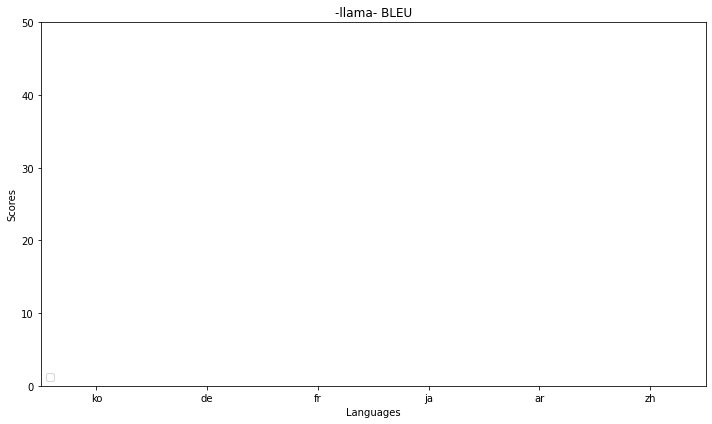

In [19]:
scores_plot("llama")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


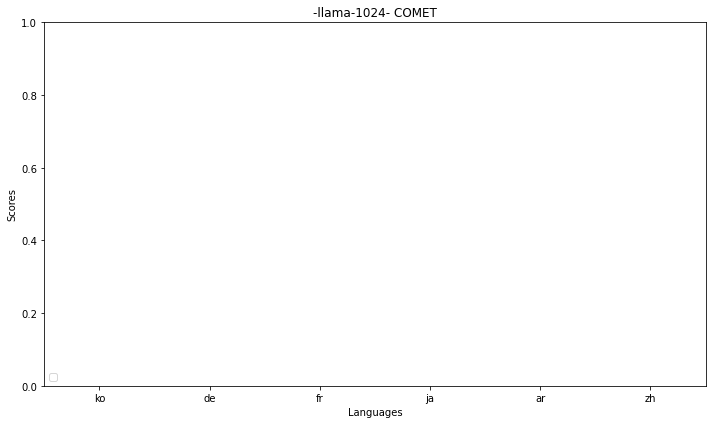

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


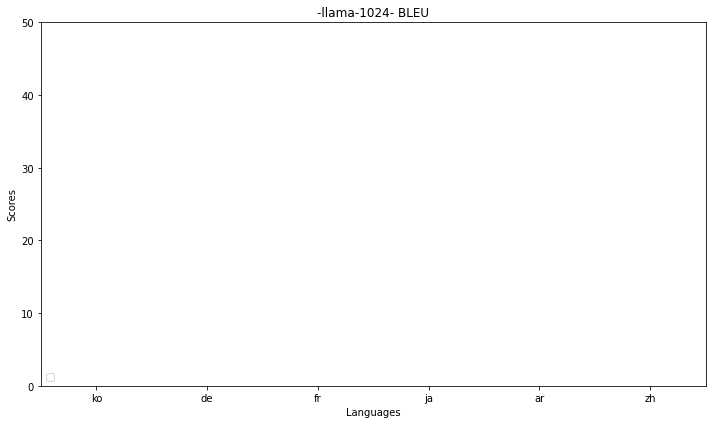

In [20]:
scores_plot("llama-1024")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


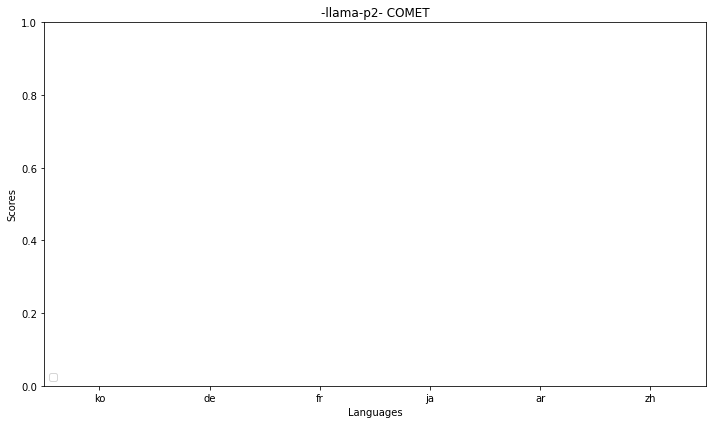

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


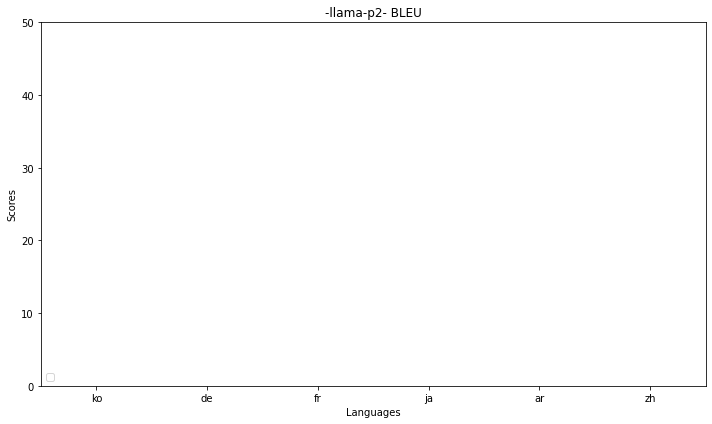

In [21]:
scores_plot("llama-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


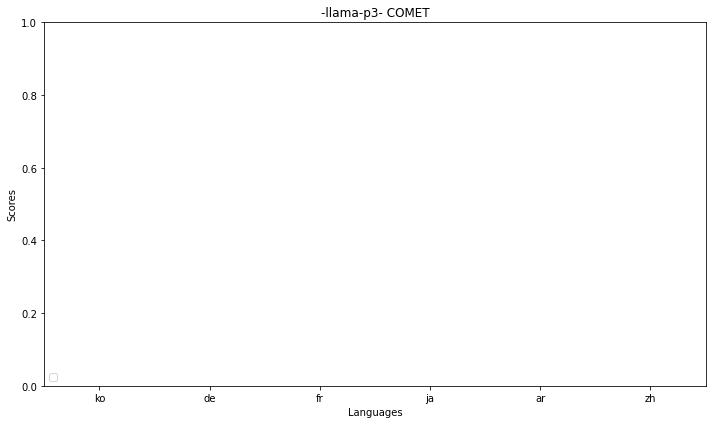

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


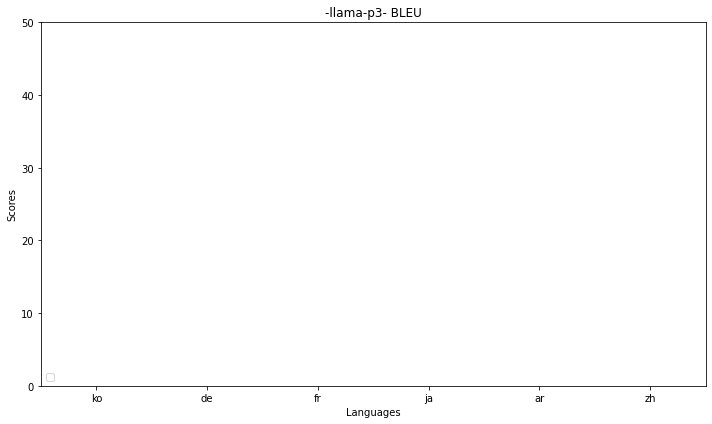

In [22]:
scores_plot("llama-p3")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


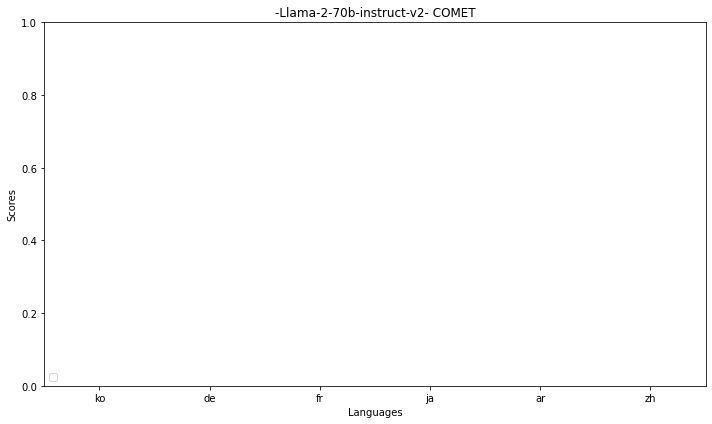

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


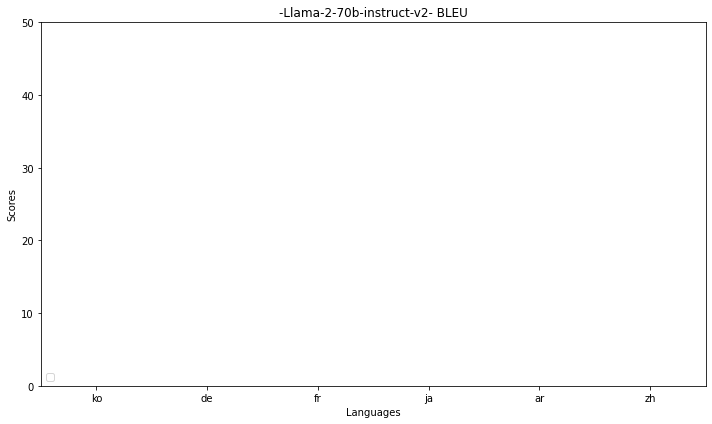

In [23]:
scores_plot("Llama-2-70b-instruct-v2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


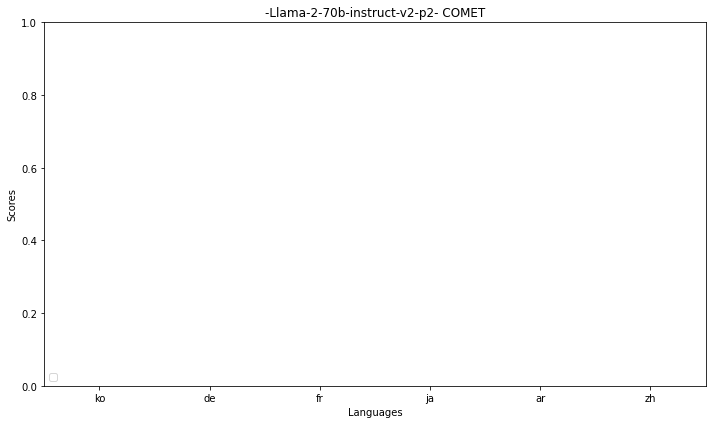

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


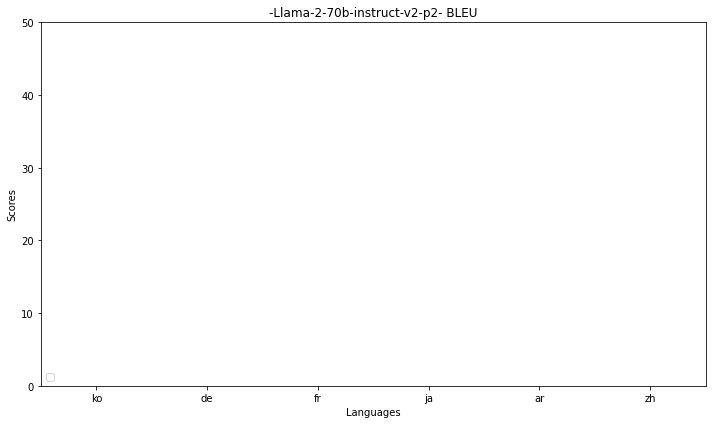

In [24]:
scores_plot("Llama-2-70b-instruct-v2-p2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
no


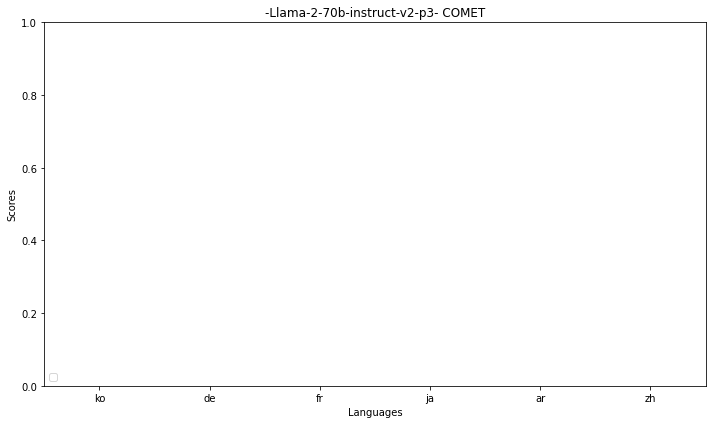

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


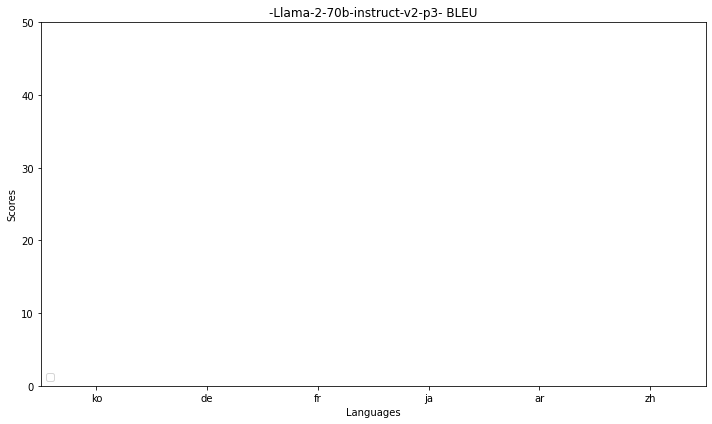

In [25]:
scores_plot("Llama-2-70b-instruct-v2-p3")